# ** PROJET 2 - Analyse des données de systèmes éducatifs **


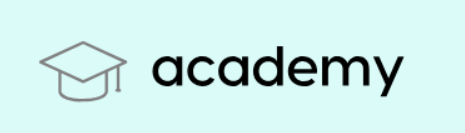

> **Academy**, startup proposant des cours en ligne, a le projet de se développer à l'international.
Il nous confie la mission d'analyse exploratoire pour savoir si les données de la Banque Mondiale permettent de valider le projet d'expansion.  
Source: [Banque Mondiale de données](https://datacatalog.worldbank.org/search/dataset/0038480)

---

In [420]:
# Installation du packahe Missingno pour le graphique de complétude des données

! pip install missingno

In [422]:
# Importation des diverses librairies qui pourraient nous être utiles

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import geopandas as gpd
import missingno as msno

In [423]:
pd.set_option('display.max_row', 70)
pd.set_option('display.max_column', 70)

# A. Analyse de la forme des données

>**EdStatsData.csv**
>Contient les indicateurs des études des systèmes éducatifs, par pays et par année, de 1970 à 2100.

In [425]:
# Importation du fichier "EdStatsData.csv" qui contient les indicateurs

df = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsData.csv")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
df.shape

(886930, 70)

In [428]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.021851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.411362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.812241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.353439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [427]:
print(f"Le tableau contient {df.shape[0]} lignes et {df.shape[1]} colonnes")

Le tableau contient 886930 lignes et 70 colonnes


In [431]:
df_drop = df.drop(list(df.filter(regex="^[-+]?[0-9]+$").columns), axis=1)
df_drop

,Country Name,Country Code,Indicator Name,Indicator Code,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN
...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN


In [432]:
df_drop.filter(like='Indicator')

,Indicator Name,Indicator Code
0,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
1,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F
2,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI
3,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M
4,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR
...,...,...
886925,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M
886926,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS
886927,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS
886928,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS


In [207]:
df.dtypes.value_counts()

float64    66
object      4
dtype: int64

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [209]:
# % de données absentes par années, triées par ordre croissant

(df.isna().sum()/df.shape[0]*100).sort_values(ascending=True)

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
2010               72.665036
2005               79.242105
2000               80.080051
2012               83.396209
2011               83.537370
2009               83.977541
2006               84.180037
2013               84.496071
2007               84.522792
2008               84.848071
1995               85.189248
2015               85.223411
2003               85.301771
2004               85.476419
1990               85.973527
2002               85.996076
2001               86.074549
1999               86.601085
2014               87.170464
1985               89.819264
1980               89.951631
1975               90.156382
1998               90.426076
1994               91.266278
1996               91.340128
1993               91.454455
1992               91.482642
1991               91.607342
1997               91.718287
1970               91.849639
2040          

<AxesSubplot:>

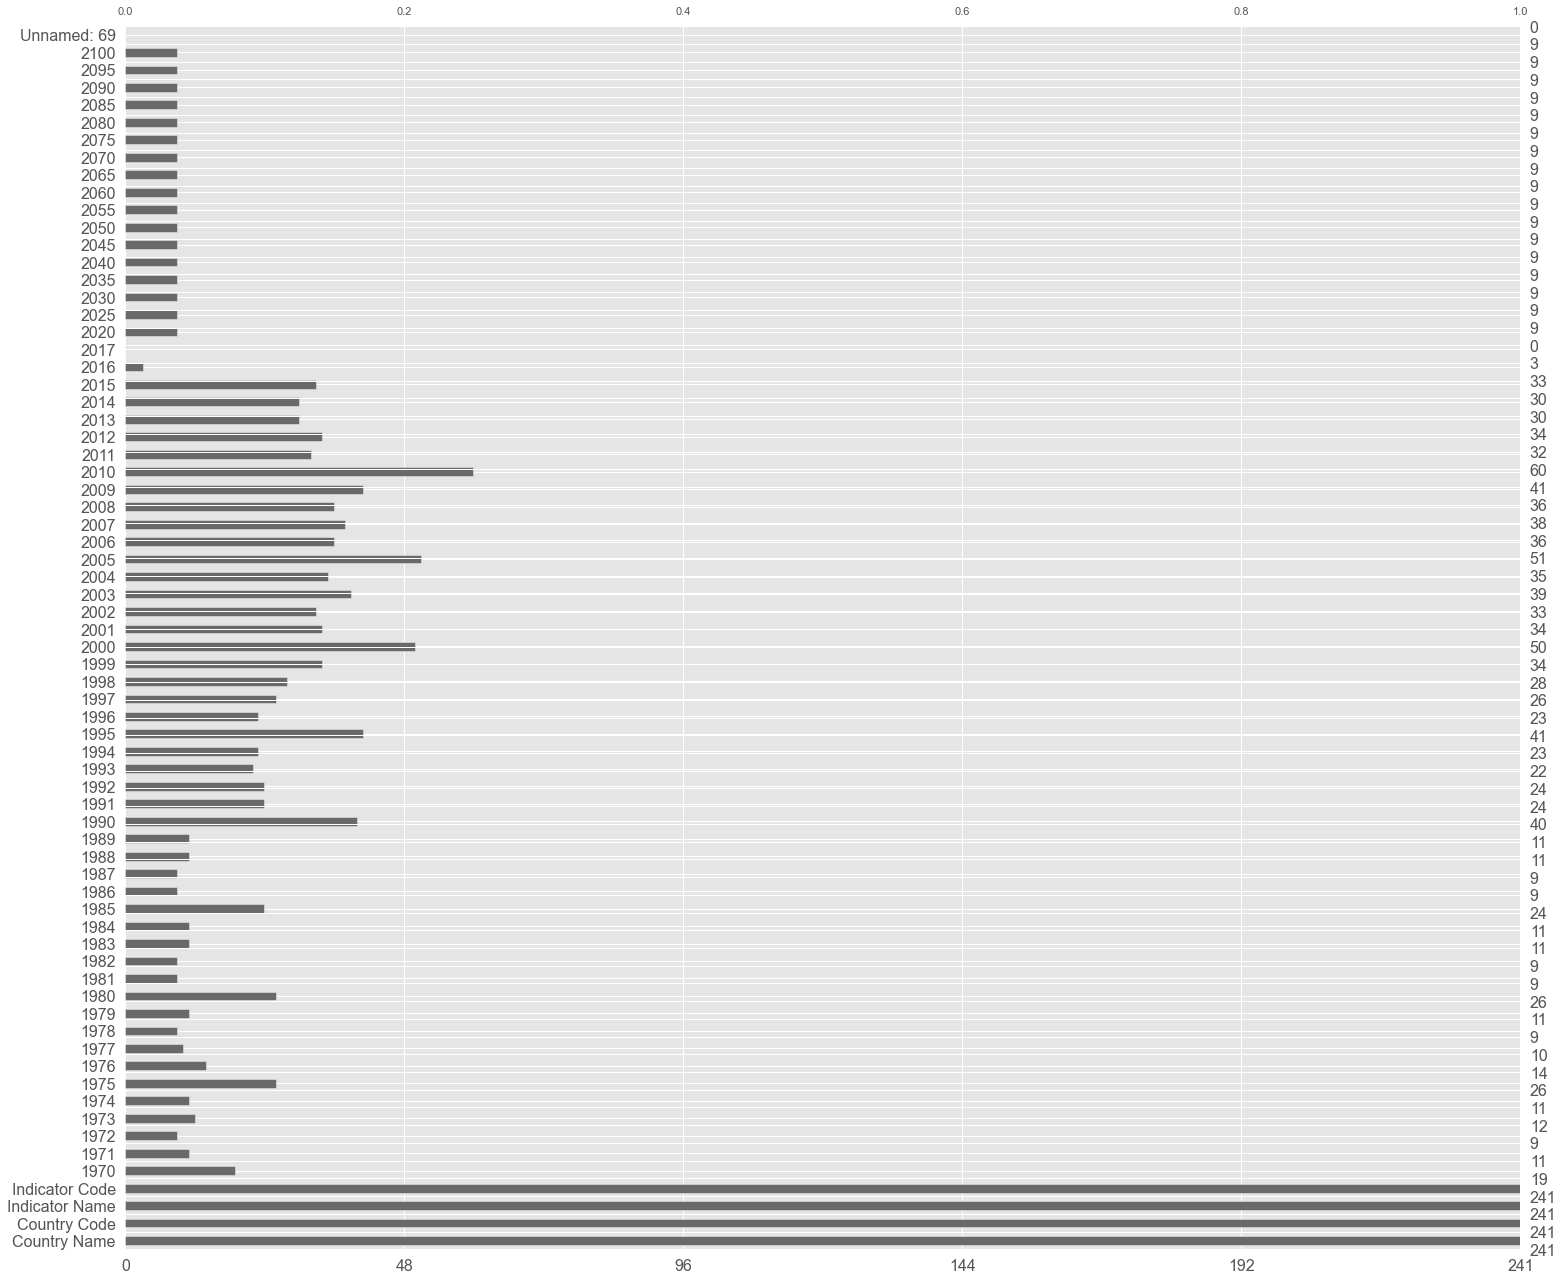

In [210]:
# Aperçu des données manquantes par années

msno.bar(df.sample(241))

Les données les plus représentatives se situent entre 2000 et 2015. Ce qui est pour notre analyse, plutôt récent. J'ai volontairement laissé 2016 et 2017, qui sont les dernières années des études.

On aurait pu éliminer les colonnes avec le plus de données manquantes mais cela aurait peut être supprimé des indicateurs que nous aurions sélectionnés par la suite.


In [211]:
# Suppression des années jugées "obsolètes" pour cette étude
# TO DO: voir si l'argument dans Drop ne peut pas être remplacé par une liste pour épuré le code

df_suppr70 = df.drop(['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979'], axis=1)

In [212]:
df_suppr80 = df_suppr70.drop(['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989'], axis=1)

In [213]:
df_suppr90 = df_suppr80.drop(['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999'], axis=1)

In [214]:
# Suppression des années prévisionnelles pour cette étude

df_suppr_prevision = df_suppr90.drop(['2020','2025','2030','2035','2040','2045','2050','2055','2060','2065','2070','2075','2080','2085','2090','2095', '2100'], axis = 1)

In [215]:
df_recent = df_suppr_prevision.drop(['Indicator Code'], axis=1)

In [216]:
# Choix de "reconvertir" la colonne Unnamed en Derniere_donnee_Dispo

df_base_date = df_recent.rename(columns = {'Unnamed: 69':'Dernieres_Donnees_Dispo'})
df_base_date.head(20)

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernieres_Donnees_Dispo
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",7.724568e+01,7.880052e+01,8.005140e+01,8.080539e+01,8.160706e+01,8.248949e+01,8.268551e+01,8.328034e+01,8.401187e+01,8.419596e+01,8.521200e+01,8.524514e+01,8.610167e+01,8.551194e+01,8.532015e+01,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",7.327562e+01,7.513298e+01,7.664102e+01,7.765358e+01,7.848540e+01,7.947577e+01,7.960833e+01,8.058242e+01,8.147380e+01,8.169569e+01,8.287165e+01,8.286139e+01,8.440141e+01,8.391403e+01,8.382083e+01,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",9.040600e-01,9.127500e-01,9.197900e-01,9.263000e-01,9.276800e-01,9.308400e-01,9.296200e-01,9.384600e-01,9.425000e-01,9.434700e-01,9.476200e-01,9.467000e-01,9.620800e-01,9.640900e-01,9.662000e-01,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",8.105137e+01,8.231505e+01,8.332406e+01,8.383223e+01,8.460439e+01,8.538029e+01,8.563508e+01,8.586669e+01,8.644414e+01,8.659069e+01,8.745258e+01,8.752652e+01,8.772817e+01,8.703988e+01,8.675339e+01,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>**EdStatsCountry.csv**
>Contient tous les données sur les pays, d'un point de vue géographique et économique

In [217]:
# Importation du fichier qui nous permet de récupérer les groupes de pays par revenus et par régions

df_geo = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsCountry.csv")
df_geo.head(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,2007,NaN,Value added at producer prices (VAP),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,2004,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,1971–84,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS

In [218]:
df_geo.shape

(241, 32)

In [219]:
f"Le tableau des pays contient {df_geo.shape[0]} lignes et {df_geo.shape[1]} colonnes"

'Le tableau des pays contient 241 lignes et 32 colonnes'

In [220]:
(df_geo.isna().sum()/df_geo.shape[0]*100).sort_values(ascending=True)

Country Code                                           0.000000
Short Name                                             0.000000
Table Name                                             0.000000
Long Name                                              0.000000
WB-2 code                                              0.414938
2-alpha code                                           1.244813
System of National Accounts                           10.788382
Currency Unit                                         10.788382
Region                                                11.203320
Income Group                                          11.203320
Latest population census                              11.618257
National accounts base year                           14.937759
System of trade                                       17.012448
SNA price valuation                                   18.257261
Latest trade data                                     23.236515
IMF data dissemination standard         

<AxesSubplot:>

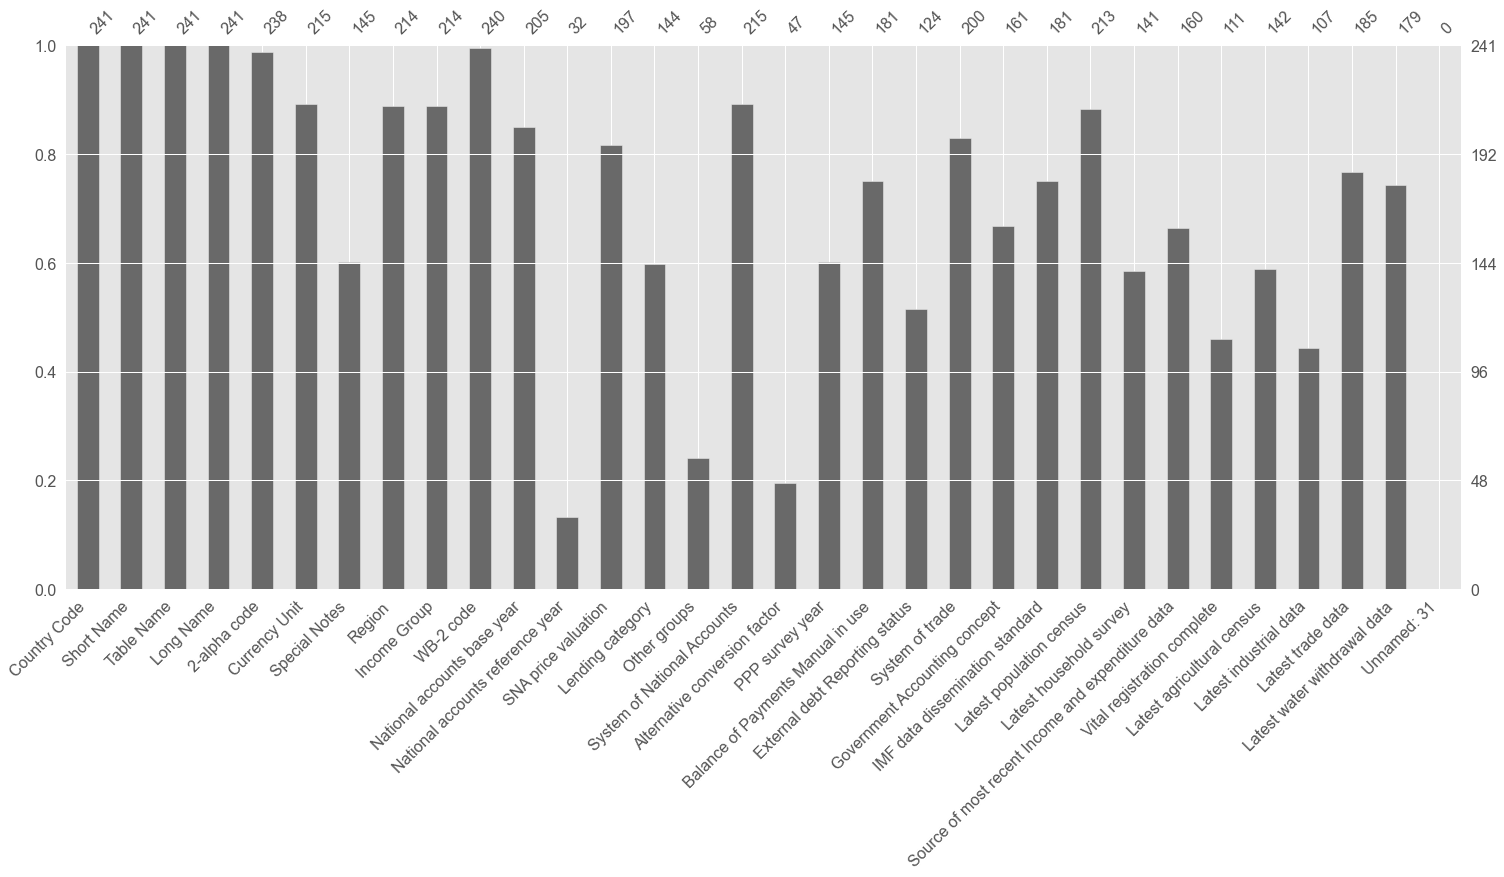

In [221]:
msno.bar(df_geo.sample(241))

In [222]:
# On supprime les colonnes qui ne seront pas exploitées dans le cadre de cette mission

df_base_geo1 = df_geo.drop(['Table Name','Long Name','2-alpha code','Currency Unit','Special Notes','WB-2 code','National accounts base year','National accounts reference year','SNA price valuation','Lending category'], axis=1)

In [223]:
df_base_geo2 = df_base_geo1.drop(['Other groups','System of National Accounts','Alternative conversion factor','PPP survey year','Balance of Payments Manual in use','External debt Reporting status','System of trade','Government Accounting concept','IMF data dissemination standard','Latest population census'], axis=1)

In [224]:
df_base_geo = df_base_geo2.drop(['Latest household survey','Source of most recent Income and expenditure data','Vital registration complete','Latest agricultural census','Latest industrial data','Latest trade data','Latest water withdrawal data','Unnamed: 31'], axis=1)

In [225]:
df_base_geo.head(10)

,Country Code,Short Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD
5,ARB,Arab World,NaN,NaN
6,ARE,United Arab Emirates,Middle East & North Africa,High income: nonOECD
7,ARG,Argentina,Latin America & Caribbean,Upper middle income
8,ARM,Armenia,Europe & Central Asia,Lower middle income
9,ASM,American Samoa,East Asia & Pacific,Upper middle income


In [226]:
df_base_geo.loc[df_base_geo['Region'].isna(),:]

,Country Code,Short Name,Region,Income Group
5,ARB,Arab World,NaN,NaN
57,EAP,East Asia & Pacific (developing only),NaN,NaN
58,EAS,East Asia & Pacific (all income levels),NaN,NaN
59,ECA,Europe & Central Asia (developing only),NaN,NaN
60,ECS,Europe & Central Asia (all income levels),NaN,NaN
63,EMU,Euro area,NaN,NaN
68,EUU,European Union,NaN,NaN
78,GIB,Gibraltar,NaN,NaN
89,HIC,High income,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),NaN,NaN


In [227]:
df_base_geo.loc[df_base_geo['Income Group'].isna(),:]

,Country Code,Short Name,Region,Income Group
5,ARB,Arab World,NaN,NaN
57,EAP,East Asia & Pacific (developing only),NaN,NaN
58,EAS,East Asia & Pacific (all income levels),NaN,NaN
59,ECA,Europe & Central Asia (developing only),NaN,NaN
60,ECS,Europe & Central Asia (all income levels),NaN,NaN
63,EMU,Euro area,NaN,NaN
68,EUU,European Union,NaN,NaN
78,GIB,Gibraltar,NaN,NaN
89,HIC,High income,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),NaN,NaN


In [228]:
# Regroupage des 2 dataframes pour récupérer les Régions et Groupes de revenus pour chaque pays

df_concat = df_base_date.merge(df_base_geo, how='inner', on='Country Code')

In [229]:
# On remet en forme la fusion des 2 dataframes

df_base = df_concat[['Region','Income Group','Country Name','Country Code','Indicator Name','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017', 'Dernieres_Donnees_Dispo']]

In [230]:
df_base.reset_index(drop = True, inplace = True)

In [231]:
df_base.tail(20)

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernieres_Donnees_Dispo
883245,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299.29,NaN,NaN,NaN,NaN,234.92,NaN,NaN,NaN
883246,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.81,NaN,NaN,NaN,NaN,78.02,NaN,NaN,NaN
883247,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,409.11,NaN,NaN,NaN,NaN,312.94,NaN,NaN,NaN
883248,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.88,NaN,NaN,NaN,NaN,135.18,NaN,NaN,NaN
883249,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197.61,NaN,NaN,NaN,NaN,234.94,NaN,NaN,NaN
883250,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304.50,NaN,NaN,NaN,NaN,370.12,NaN,NaN,NaN
883251,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,815.28,NaN,NaN,NaN,NaN,752.87,NaN,NaN,NaN
883252,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799.57,NaN,NaN,NaN,NaN,721.56,NaN,NaN,NaN
883253,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1614.84,NaN,NaN,NaN,NaN,1474.43,NaN,NaN,NaN
883254,Sub-Saharan Africa,Low income,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1401.82,NaN,NaN,NaN,NaN,1722.96,NaN,NaN,NaN


In [ ]:
# préciser que c'est la base

>**EdStatsCountry-Series.csv**
> Il contient les sources des études

In [232]:
# Importation du fichier EdStatsCountry-Series

sources = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsCountry-Series.csv")
sources.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [233]:
sources.shape

(613, 4)

In [234]:
(sources.isna().sum()/sources.shape[0]*100).sort_values(ascending=True)

CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
Unnamed: 3     100.0
dtype: float64

<AxesSubplot:>

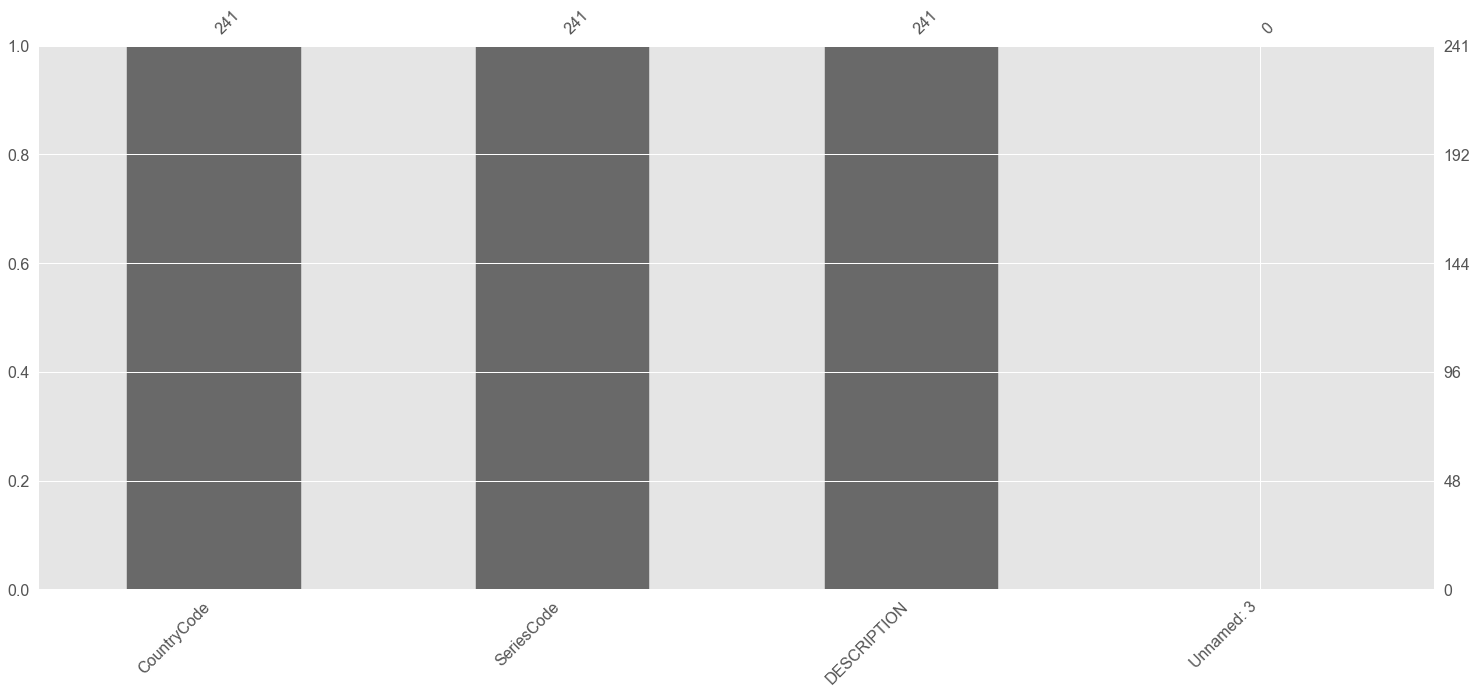

In [235]:
msno.bar(sources.sample(241))

>**EdSstatsSeries.csv**
> Il contient des informations sur la définition des indicateurs.

In [236]:
# Importation du fichier EdSstatsSeries

stats_series = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsSeries.csv")
stats_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
stats_series.shape

(3665, 21)

<AxesSubplot:>

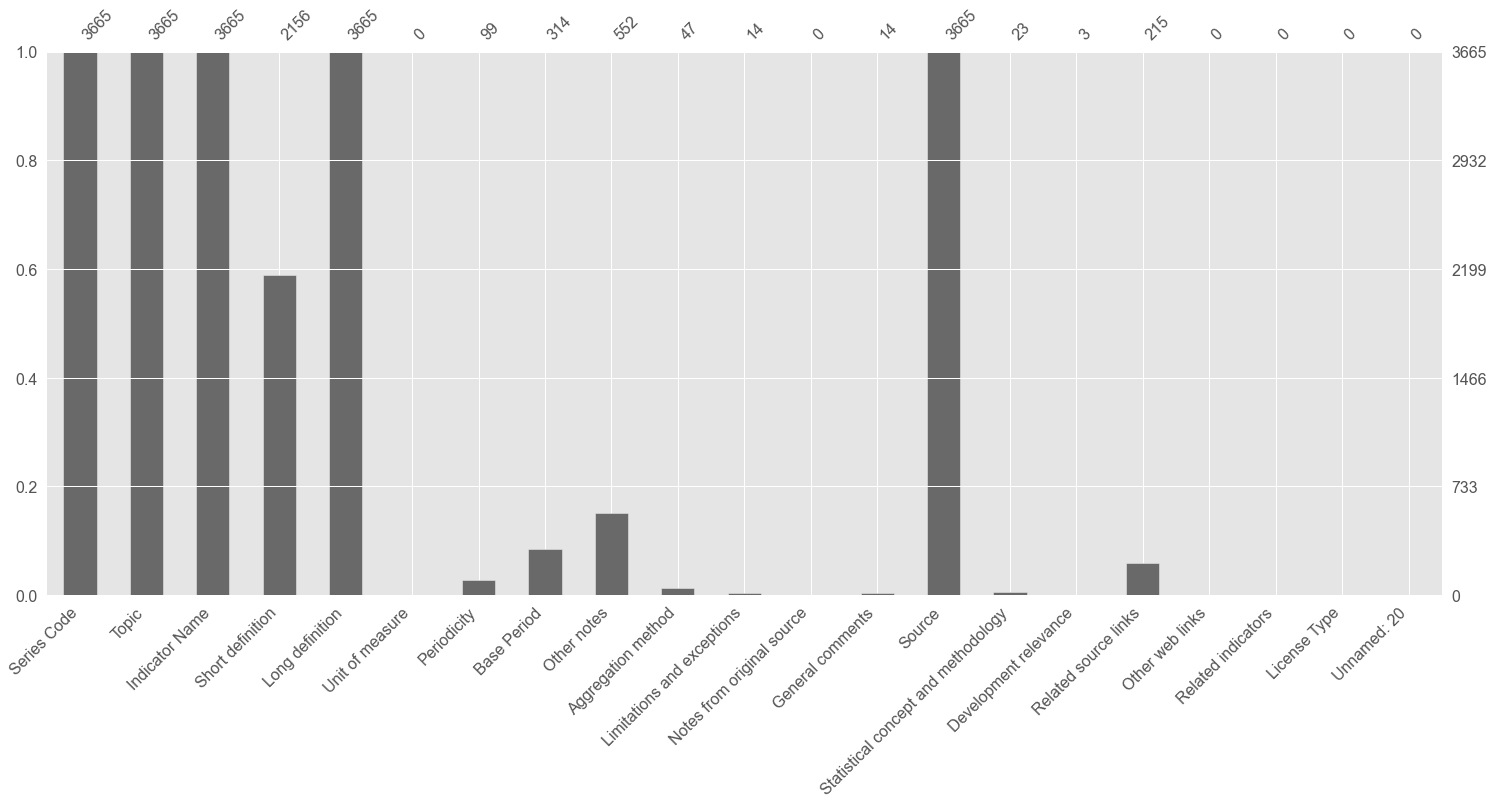

In [239]:
msno.bar(stats_series.sample(3665))

>**EdStatsFootNote.csv**
> Il contient des informations sur les codes et les dates des indicateurs 

In [240]:
# Importation du fichier EdStatsFootNote
note = pd.read_csv(r"C:\Users\choup\Desktop\projet\openclassroom-projet2\data\EdStatsFootNote.csv")
note.head(20)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN


In [241]:
note.shape

(643638, 5)

In [242]:
(note.isna().sum()/note.shape[0]*100).sort_values(ascending=True)

CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
Unnamed: 4     100.0
dtype: float64

<AxesSubplot:>

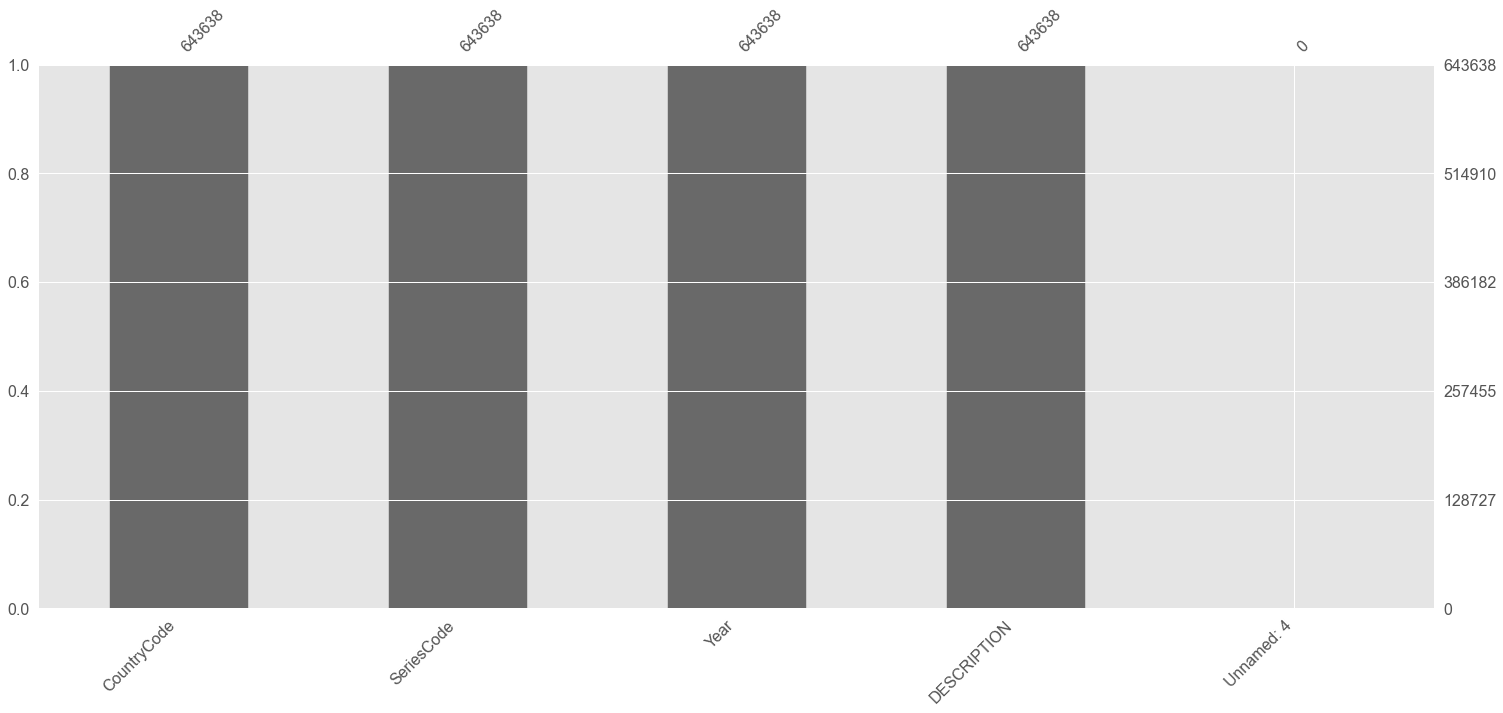

In [243]:
msno.bar(note.sample(643638))

---

## Note de l'analyse de forme des données  

Les données ont été chargées depuis la Banque Mondiale des données. Elles permettent d'obtenir un grand nombre de résultats sur les divers indicateurs liés à l'éducation, l'économie, la démographie des pays du monde à travers les année.  
  
  - Il y a 5 jeux de données mais nous allons nous servir que de 2 qui semblent plus appropriés pour cette étude.  
  - Les observations se feront par pays ou par regroupement de pays.  
  - Les données sont observées depuis 1970 et il existe également des prévisions jusqu'en 2100. Pour notre étude, nous avons réduit notre analyse de 2000 à 2017.

---

# B. Analyse de fond

## I. INDICATEURS POPULATIONS

### 1. Population totale

Il me parait judicieux de pouvoir se rendre compte du nombre de la population des pays étudiés. En effet, préconiser un développement sur un pays avec peu d'habitants ne serait pas judicieux.  

**Méthode appliquée:**  
- L'indicateur *'population totale'* se trouve dans le dataframe EdStatsData.csv
- Vérification que les pays sont uniques, qu'il n'y a pas de doublon
- Vérification de la complétude des données par années
- Complétude des données manquantes par les dernières données les plus récentes
- Seuils minimal et maximal de population que nous souhaitons prende en compte
- Visualisation des pays ayant le plus de population

In [244]:
# Population totale =
# Population, total

df_pop1 = df_base[df_base['Indicator Name'].isin(['Population, total'])]

In [245]:
# Vérifier qu'il n'y a pas de doublon de pays

df_pop1.loc[df_pop1['Country Name'].duplicated(keep=False),:].sum()

Region                     0.0
Income Group               0.0
Country Name               0.0
Country Code               0.0
Indicator Name             0.0
2000                       0.0
2001                       0.0
2002                       0.0
2003                       0.0
2004                       0.0
2005                       0.0
2006                       0.0
2007                       0.0
2008                       0.0
2009                       0.0
2010                       0.0
2011                       0.0
2012                       0.0
2013                       0.0
2014                       0.0
2015                       0.0
2016                       0.0
2017                       0.0
Dernieres_Donnees_Dispo    0.0
dtype: float64

In [246]:
df_pop1['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [247]:
df_pop1.shape

(241, 24)

<AxesSubplot:>

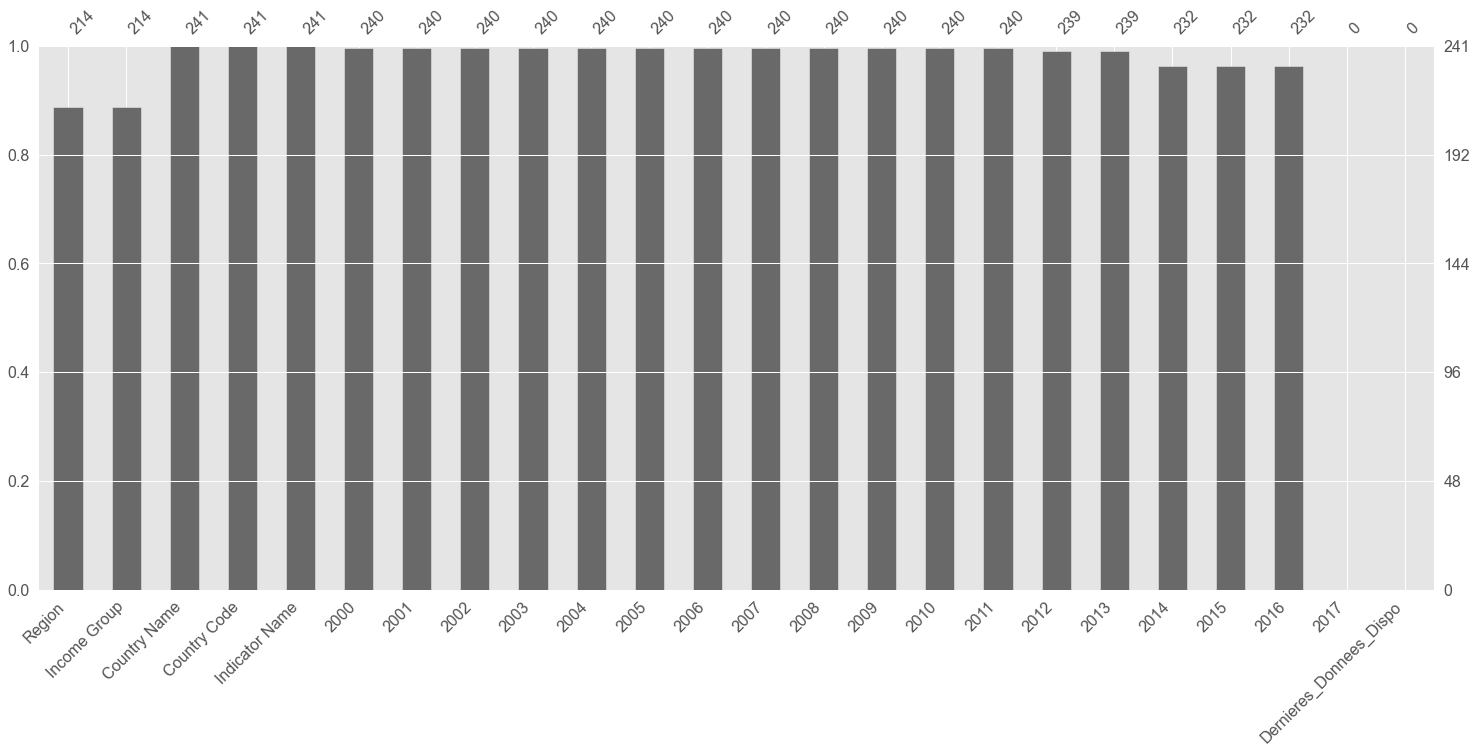

In [248]:
msno.bar(df_pop1.sample(241))

In [249]:
# Remplis la dernière colonne avec la dernière donnée disponible

df_pop1_complet = df_pop1.fillna(method ='ffill', axis = 1) 

In [250]:
df_pop1_complet.dtypes

Region                     object
Income Group               object
Country Name               object
Country Code               object
Indicator Name             object
2000                       object
2001                       object
2002                       object
2003                       object
2004                       object
2005                       object
2006                       object
2007                       object
2008                       object
2009                       object
2010                       object
2011                       object
2012                       object
2013                       object
2014                       object
2015                       object
2016                       object
2017                       object
Dernieres_Donnees_Dispo    object
dtype: object

In [251]:
# Convertit la colonne Dernieres_Donnees_Dispo en float

df_pop1_complet['Dernieres_Donnees_Dispo'] = pd.to_numeric(df_pop1_complet['Dernieres_Donnees_Dispo'],errors='coerce', downcast="float")

In [252]:
# df_pop1_complet['2000', '2001'].astype(float64)
# Ne fonctionne pas pour mettre toutes les années en float64

In [253]:
# Seuils de population à garder

threshold_low_population = 500000
threshold_upper_population = 2e+08

In [254]:
df_pop1_selection = df_pop1_complet[(df_pop1_complet['Dernieres_Donnees_Dispo'] > threshold_low_population) & (df_pop1_complet['Dernieres_Donnees_Dispo'] < threshold_upper_population) ]

In [255]:
df_pop1_selection.sort_values('Dernieres_Donnees_Dispo', ascending = False).head(20)

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernieres_Donnees_Dispo
632913,South Asia,Lower middle income,Pakistan,PAK,"Population, total",138523285.0,141601437.0,144654143.0,147703401.0,150780300.0,153909667.0,157093993.0,160332974.0,163644603.0,167049580.0,170560182.0,174184265.0,177911533.0,181712595.0,185546257.0,189380513.0,193203476.0,193203476.0,193203472.0
618253,Sub-Saharan Africa,Lower middle income,Nigeria,NGA,"Population, total",122352009.0,125463434.0,128666710.0,131972533.0,135393616.0,138939478.0,142614094.0,146417024.0,150347390.0,154402181.0,158578261.0,162877076.0,167297284.0,171829303.0,176460502.0,181181744.0,185989640.0,185989640.0,185989632.0
149133,South Asia,Low income,Bangladesh,BGD,"Population, total",131581243.0,134107160.0,136600667.0,139019001.0,141307489.0,143431101.0,145368004.0,147139191.0,148805814.0,150454708.0,152149102.0,153911916.0,155727053.0,157571292.0,159405279.0,161200886.0,162951560.0,162951560.0,162951552.0
676893,Europe & Central Asia,High income: nonOECD,Russian Federation,RUS,"Population, total",146596557.0,145976083.0,145306046.0,144648257.0,144067054.0,143518523.0,143049528.0,142805088.0,142742350.0,142785342.0,142849449.0,142960868.0,143201676.0,143506911.0,143819666.0,144096870.0,144342396.0,144342396.0,144342400.0
555948,Latin America & Caribbean,Upper middle income,Mexico,MEX,"Population, total",101719673.0,103067068.0,104355608.0,105640453.0,106995583.0,108472228.0,110092378.0,111836346.0,113661809.0,115505228.0,117318941.0,119090017.0,120828307.0,122535969.0,124221600.0,125890949.0,127540423.0,127540423.0,127540424.0
445998,East Asia & Pacific,High income: OECD,Japan,JPN,"Population, total",126843000.0,127149000.0,127445000.0,127718000.0,127761000.0,127773000.0,127854000.0,128001000.0,128063000.0,128047000.0,128070000.0,127833000.0,127629000.0,127445000.0,127276000.0,127141000.0,126994511.0,126994511.0,126994512.0
654903,East Asia & Pacific,Lower middle income,Philippines,PHL,"Population, total",77991569.0,79665315.0,81352060.0,83031954.0,84678493.0,86274237.0,87809419.0,89293490.0,90751864.0,92220879.0,93726624.0,95277940.0,96866642.0,98481032.0,100102249.0,101716359.0,103320222.0,103320222.0,103320224.0
321388,Sub-Saharan Africa,Low income,Ethiopia,ETH,"Population, total",66537331.0,68492257.0,70497192.0,72545144.0,74624405.0,76727083.0,78850689.0,81000409.0,83184892.0,85416253.0,87702670.0,90046756.0,92444183.0,94887724.0,97366774.0,99873033.0,102403196.0,102403196.0,102403200.0
303063,Middle East & North Africa,Lower middle income,"Egypt, Arab Rep.",EGY,"Population, total",69905988.0,71226940.0,72590118.0,73981942.0,75381899.0,76778149.0,78159048.0,79537253.0,80953881.0,82465022.0,84107606.0,85897561.0,87813257.0,89807433.0,91812566.0,93778172.0,95688681.0,95688681.0,95688680.0
863808,East Asia & Pacific,Lower middle income,Vietnam,VNM,"Population, total",77630900.0,78620500.0,79537700.0,80467400.0,81436400.0,82392100.0,83311200.0,84218500.0,85118700.0,86025000.0,86932500.0,87860300.0,88809200.0,89759500.0,90728900.0,91713300.0,92701100.0,92701100.0,92701104.0


In [256]:
df_pop1_selection.loc[:,['Country Name','Dernieres_Donnees_Dispo']].sort_values('Dernieres_Donnees_Dispo', ascending = False).head(10)

,Country Name,Dernieres_Donnees_Dispo
632913,Pakistan,193203472.0
618253,Nigeria,185989632.0
149133,Bangladesh,162951552.0
676893,Russian Federation,144342400.0
555948,Mexico,127540424.0
445998,Japan,126994512.0
654903,Philippines,103320224.0
321388,Ethiopia,102403200.0
303063,"Egypt, Arab Rep.",95688680.0
863808,Vietnam,92701104.0


### 2. Population d'âge officiel pour le secondaire supérieur // INDICATEUR NON CONSERVE

In [257]:
# Population d'âge officiel pour le secondaire supérieur =
# Population of the official age for upper secondary education, both sexes (number)

In [258]:
df_pop2 = df_base[df_base['Indicator Name'].isin(['Population of the official age for upper secondary education, both sexes (number)'])]
df_pop2_complet = df_pop2.fillna(method ='ffill', axis = 1) 
df_pop2_complet['Dernieres_Donnees_Dispo'] = pd.to_numeric(df_pop2_complet['Dernieres_Donnees_Dispo'],errors='coerce', downcast="float")
df_pop2_complet.shape

(241, 24)

<AxesSubplot:>

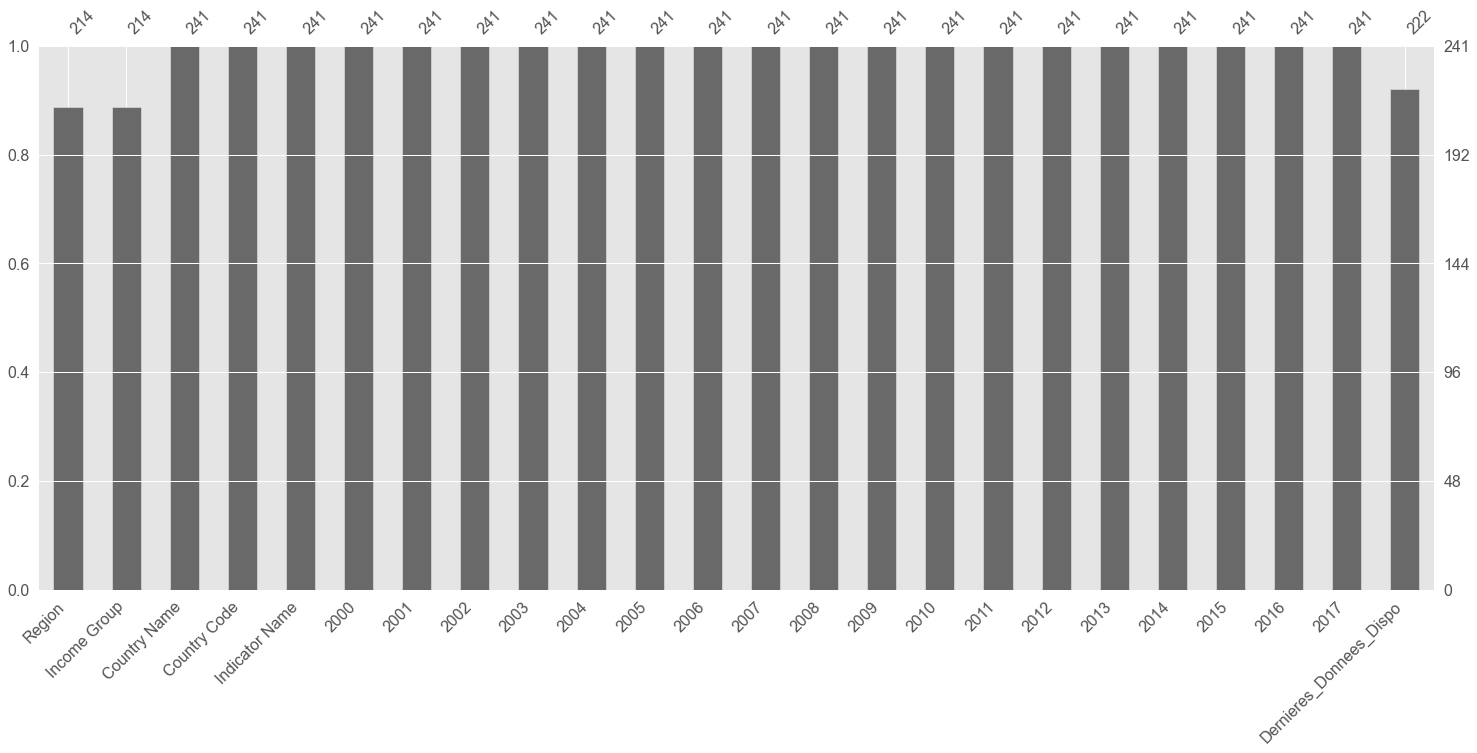

In [259]:
msno.bar(df_pop2_complet.sample(241))

Bien que cet indicateur soit représentatif de l'âge officiel pour le secondaire, nous ne le retenons pas pour notre étude. En effet, il comporte 202 données actualisées, contrairement à l'indicateur de la population total (241). De plus, l'âge d'entrée dans le secondaire peut être un peu biaisée car suivant les pays, l'âge différe.

## II. POPULATIONS CIBLES
### 1. Taux net de scolarisation // NON CONSERVE

In [260]:
# Taux net de scolarisation ajusté, deuxième cycle du secondaire, les deux sexes (%) =
# Adjusted net enrolment rate, upper secondary, both sexes (%)

In [261]:
df_secondaire1 = df_base[df_base['Indicator Name'].isin(['Adjusted net enrolment rate, upper secondary, both sexes (%)'])]
df_secondaire1_complet = df_secondaire1.fillna(method ='ffill', axis = 1) 
df_secondaire1_complet['Dernieres_Donnees_Dispo'] = pd.to_numeric(df_secondaire1_complet['Dernieres_Donnees_Dispo'],errors='coerce', downcast="float")
df_secondaire1_complet.shape

(241, 24)

<AxesSubplot:>

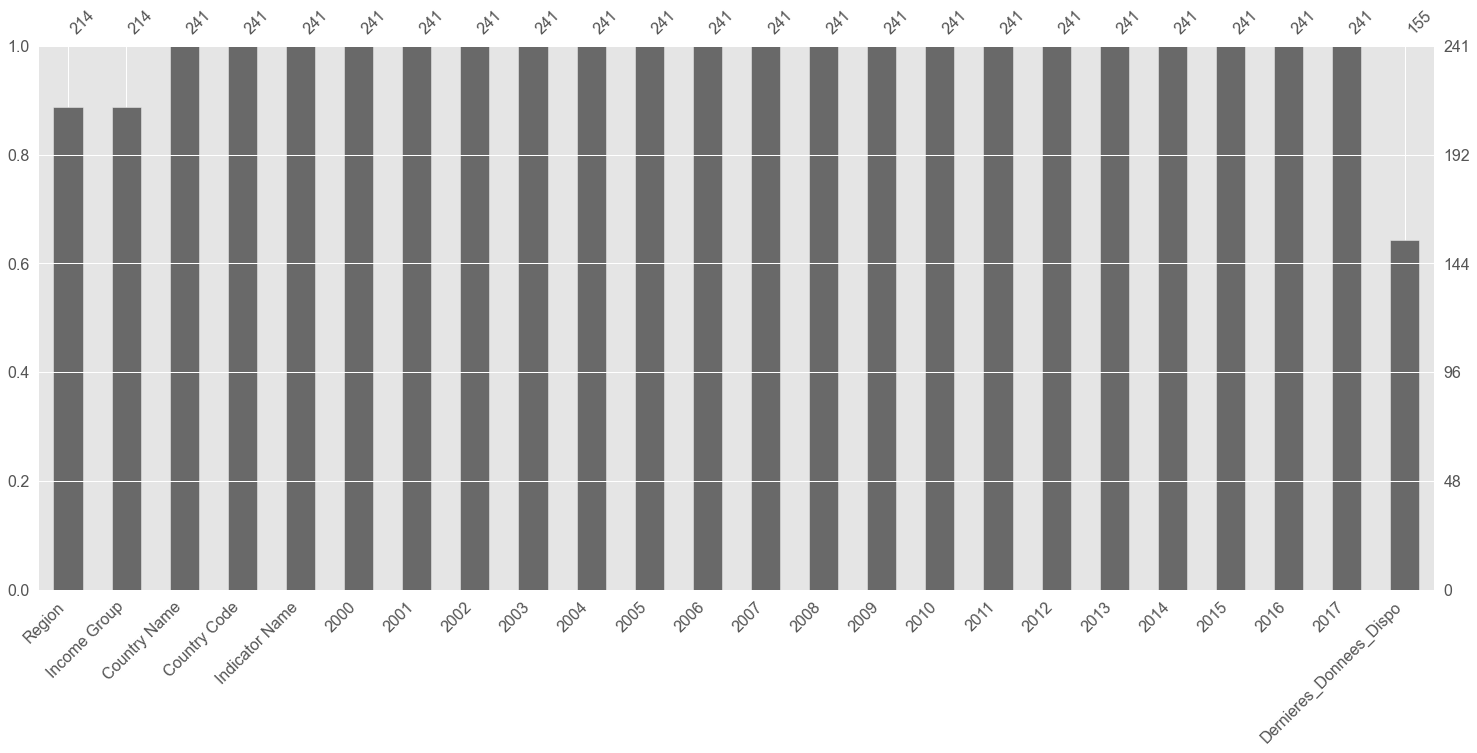

In [262]:
msno.bar(df_secondaire1_complet.sample(241))

Nous ne retenons pas cet indicateur car les données actualisées ne concernent que 155 pays.

### 2. Barro Lee: % 15 ans et plus, études complètes // NON CONSERVE

In [263]:
# Barro-Lee : Pourcentage de la population âgée de 15 ans et plus ayant fait des études secondaires. Secondaire terminé =
# Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary

In [264]:
df_secondaire2 = df_base[df_base['Indicator Name'].isin(['Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary'])]
df_secondaire2_complet = df_secondaire2.fillna(method ='ffill', axis = 1) 
df_secondaire2_complet['Dernieres_Donnees_Dispo'] = pd.to_numeric(df_secondaire2_complet['Dernieres_Donnees_Dispo'],errors='coerce', downcast="float")
df_secondaire2_complet. shape

(241, 24)

<AxesSubplot:>

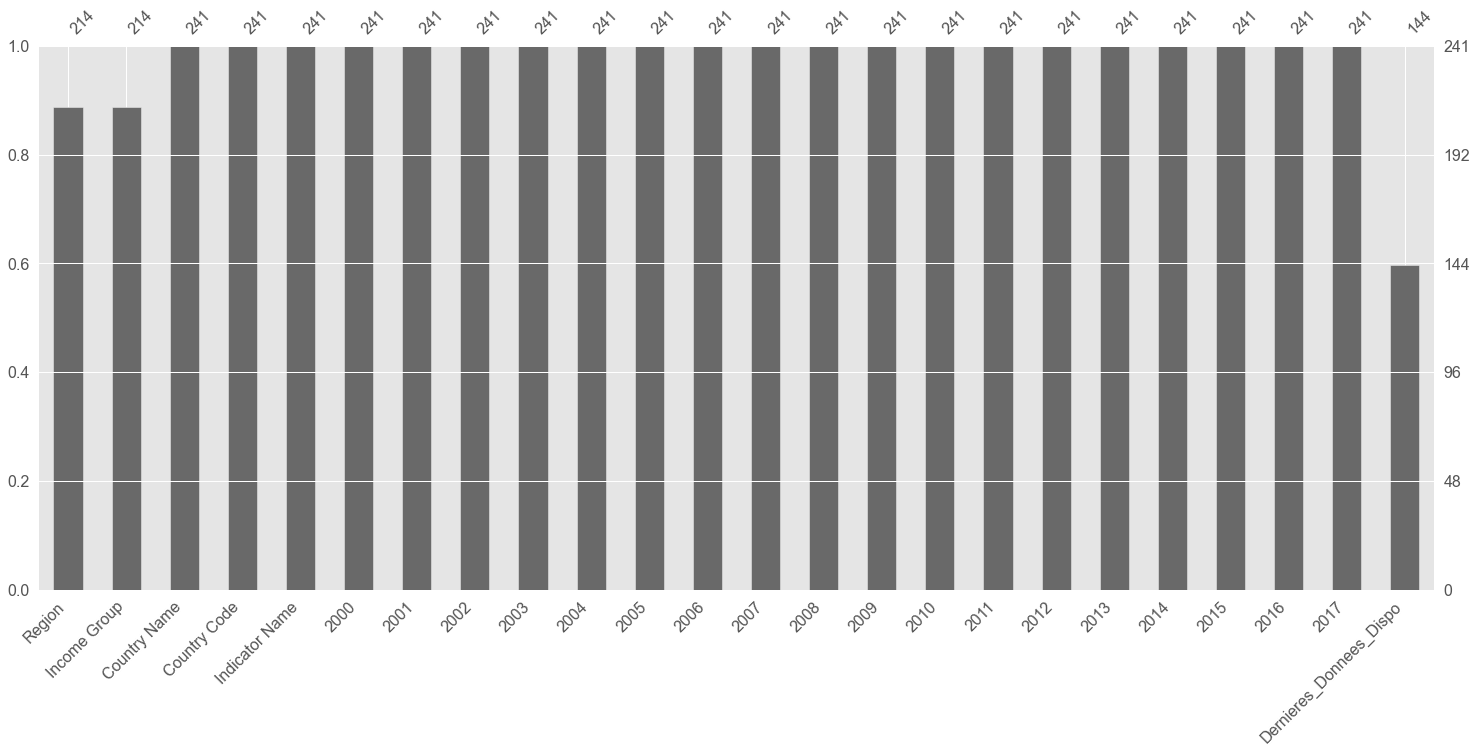

In [265]:
msno.bar(df_secondaire2_complet.sample(241))

Nous ne retenons pas cet indicateur car les données actualisées ne concernent que 144 pays.

### 3. Scolarisation dans le secondaire

In [266]:
# Scolarisation dans l'enseignement secondaire, les deux sexes = 
# Enrolment in secondary education, both sexes (number) 

df_secondaire3 = df_base[df_base['Indicator Name'].isin(['Enrolment in secondary education, both sexes (number)'])]
df_secondaire3_complet = df_secondaire3.fillna(method ='ffill', axis = 1) 
df_secondaire3_complet['Dernieres_Donnees_Dispo'] = pd.to_numeric(df_secondaire3_complet['Dernieres_Donnees_Dispo'],errors='coerce', downcast="float")
df_secondaire3_complet.shape

(241, 24)

<AxesSubplot:>

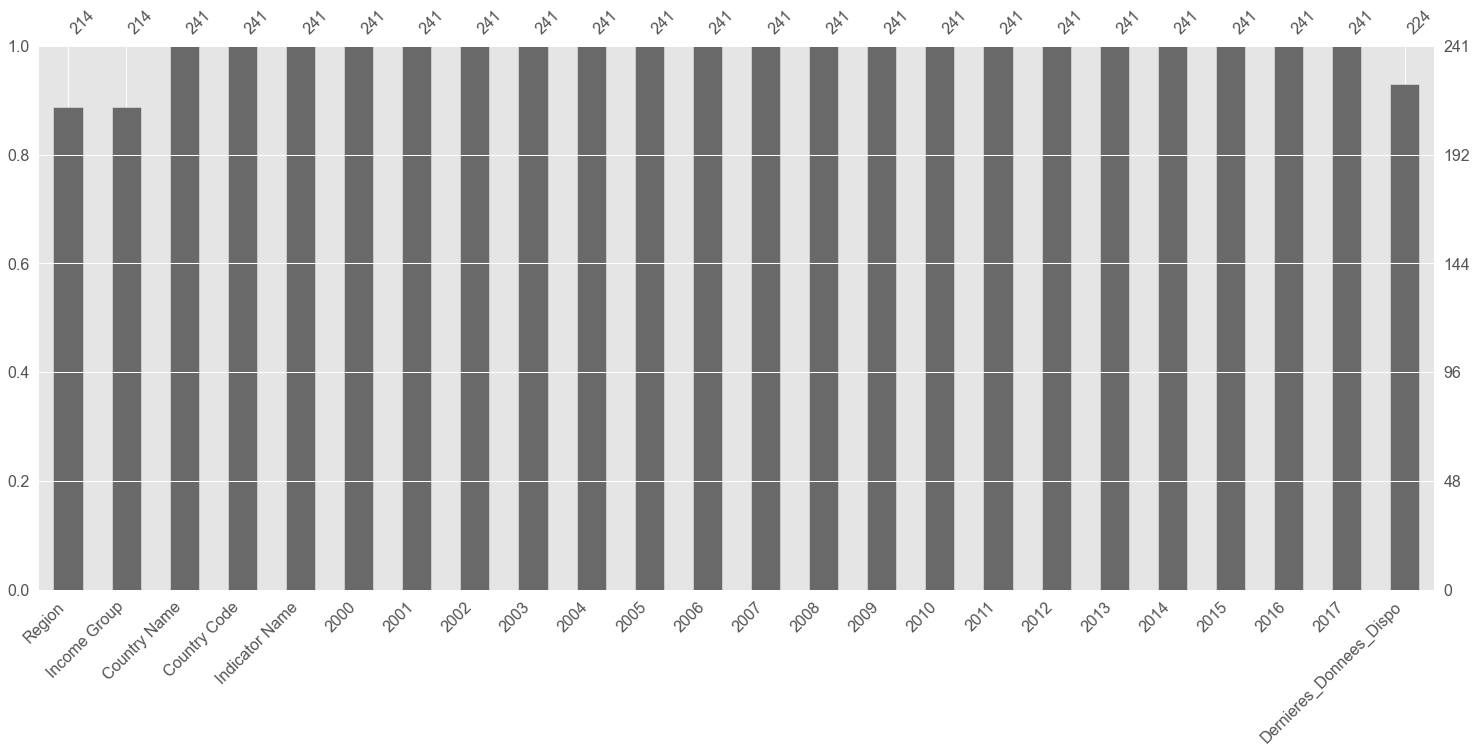

In [267]:
msno.bar(df_secondaire3_complet.sample(241))

Il y a 224 pays dont les données ont pu être mis à jour.

In [268]:
# Calcul de la médiane par groupe de pays

df_secondaire3_complet.groupby('Region').median('Dernieres_Donnees_Dispo')

,Dernieres_Donnees_Dispo
Region,
East Asia & Pacific,330163.0
Europe & Central Asia,553448.0
Latin America & Caribbean,278941.0
Middle East & North Africa,766943.0
North America,2697507.0
South Asia,2988023.5
Sub-Saharan Africa,567838.0


In [269]:
df_secondaire3_complet.groupby('Region').mean('Dernieres_Donnees_Dispo')

,Dernieres_Donnees_Dispo
Region,
East Asia & Pacific,4.965728e+06
Europe & Central Asia,1.513734e+06
Latin America & Caribbean,1.653885e+06
Middle East & North Africa,1.768009e+06
North America,8.977108e+06
South Asia,2.060894e+07
Sub-Saharan Africa,1.229300e+06


In [270]:
# Supprime les régions et les incomes groupe car Les régions et income Group ont des Nan dans la colonne Région

df_secondaire3_selection = df_secondaire3_complet.dropna(subset=['Region'])
df_secondaire3_selection.sort_values('Dernieres_Donnees_Dispo', ascending = False).head(50)
df_secondaire3_selection

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernieres_Donnees_Dispo
92816,South Asia,Low income,Afghanistan,AFG,"Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...",362415.0,362415.0,406895.0,594306.0,651453.0,1006841.0,1035782.0,1425009.0,1716190.0,2044157.0,2208963.0,2415884.0,2538420.0,2602734.0,2698816.0,2698816.0,2698816.0,2698816.0
96481,Europe & Central Asia,Upper middle income,Albania,ALB,"Enrolment in secondary education, both sexes (...",365664.0,377936.0,382205.0,396095.0,393503.0,407403.0,408980.0,410444.0,406553.0,354587.0,355871.0,355158.0,349269.0,346365.0,333291.0,315079.0,315079.0,315079.0,315079.0
100146,Middle East & North Africa,Upper middle income,Algeria,DZA,"Enrolment in secondary education, both sexes (...",2994258.0,3188826.0,3352340.0,3455930.0,3604785.0,3654232.0,3664852.0,3724095.0,3984536.0,4576166.0,4616226.0,4572513.0,4572513.0,4572513.0,4572513.0,4572513.0,4572513.0,4572513.0,4572513.0
103811,East Asia & Pacific,Upper middle income,American Samoa,ASM,"Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...",NaN
107476,Europe & Central Asia,High income: nonOECD,Andorra,AND,"Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...",3132.0,3194.0,3250.0,3737.0,3843.0,3819.0,3851.0,3914.0,4059.0,4159.0,4208.0,4239.0,4319.0,4395.0,4395.0,4395.0,4395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866131,Latin America & Caribbean,High income: nonOECD,Virgin Islands (U.S.),VIR,"Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...","Enrolment in secondary education, both sexes (...",NaN
869796,Middle East & North Africa,Lower middle income,West Bank and Gaza,PSE,"Enrolment in secondary education, both sexes (...",477378.0,510214.0,544935.0,582736.0,628495.0,656797.0,685585.0,701715.0,707892.0,713921.0,710936.0,705627.0,705443.0,706330.0,709226.0,721414.0,721414.0,721414.0,721414.0
873461,Middle East & North Africa,Lower mid

In [271]:
# On veut connaitre les pays qui n'ont pas de donnée sur l'inscription dans le secondaire et voir ce qu'on peut en faire.
# On regarde avec isna sur les dernières données disponibles.

df_secondaire_pop_na = df_secondaire3_selection[df_secondaire3_selection['Dernieres_Donnees_Dispo'].isna()]
df_secondaire_pays_sans_donnees = df_secondaire_pop_na.loc[:,['Country Name','Region','Dernieres_Donnees_Dispo']]
df_secondaire_pays_sans_donnees

,Country Name,Region,Dernieres_Donnees_Dispo
103811,American Samoa,East Asia & Pacific,NaN
136796,Azerbaijan,Europe & Central Asia,NaN
232086,Channel Islands,Europe & Central Asia,NaN
323711,Faroe Islands,Europe & Central Asia,NaN
338371,French Polynesia,East Asia & Pacific,NaN
367691,Greenland,Europe & Central Asia,NaN
375021,Guam,East Asia & Pacific,NaN
393346,Haiti,Latin America & Caribbean,NaN
429996,Isle of Man,Europe & Central Asia,NaN
470311,Kosovo,Europe & Central Asia,NaN


In [272]:
# On constate que ce ne sont pas des pays à fort attrait pour notre projet => suppression des lignes

df_secondaire3_selection = df_secondaire3_selection.dropna(axis = 0, how = 'any')

In [273]:
df_secondaire3_selection.isna().sum()

Region                     0
Income Group               0
Country Name               0
Country Code               0
Indicator Name             0
2000                       0
2001                       0
2002                       0
2003                       0
2004                       0
2005                       0
2006                       0
2007                       0
2008                       0
2009                       0
2010                       0
2011                       0
2012                       0
2013                       0
2014                       0
2015                       0
2016                       0
2017                       0
Dernieres_Donnees_Dispo    0
dtype: int64

In [274]:
# Tri pour connaitre les 10 pays qui ont le plus d'inscriptions dans le secondaire

df_secondaire3_selection.loc[:,['Country Name','Dernieres_Donnees_Dispo']].sort_values('Dernieres_Donnees_Dispo', ascending = False).head(10)

,Country Name,Dernieres_Donnees_Dispo
411671,India,129542056.0
239416,China,86127200.0
844141,United States,24229776.0
415336,Indonesia,23756316.0
188106,Brazil,23501784.0
147791,Bangladesh,14566771.0
554606,Mexico,12993322.0
616911,Nigeria,12532753.0
631571,Pakistan,12077917.0
814821,Turkey,10969178.0


***

## III. INDICATEURS GOUV
### 1. Dépenses pour le secondaire % des dépenses publiques

In [275]:
# Dépenses pour le secondaire en % des dépenses publiques d'éducation = 
# Expenditure on secondary as % of government expenditure on education (%) 

df_aide_gouvernement1 = df_base[df_base['Indicator Name'].isin(['Expenditure on secondary as % of government expenditure on education (%)'])]
df_aide_gouvernement1_complet = df_aide_gouvernement1.fillna(method ='ffill', axis = 1) 
df_aide_gouvernement1_complet['Dernieres_Donnees_Dispo'] = pd.to_numeric(df_aide_gouvernement1_complet['Dernieres_Donnees_Dispo'],errors='coerce', downcast="float")
df_aide_gouvernement1_complet.shape

(241, 24)

<AxesSubplot:>

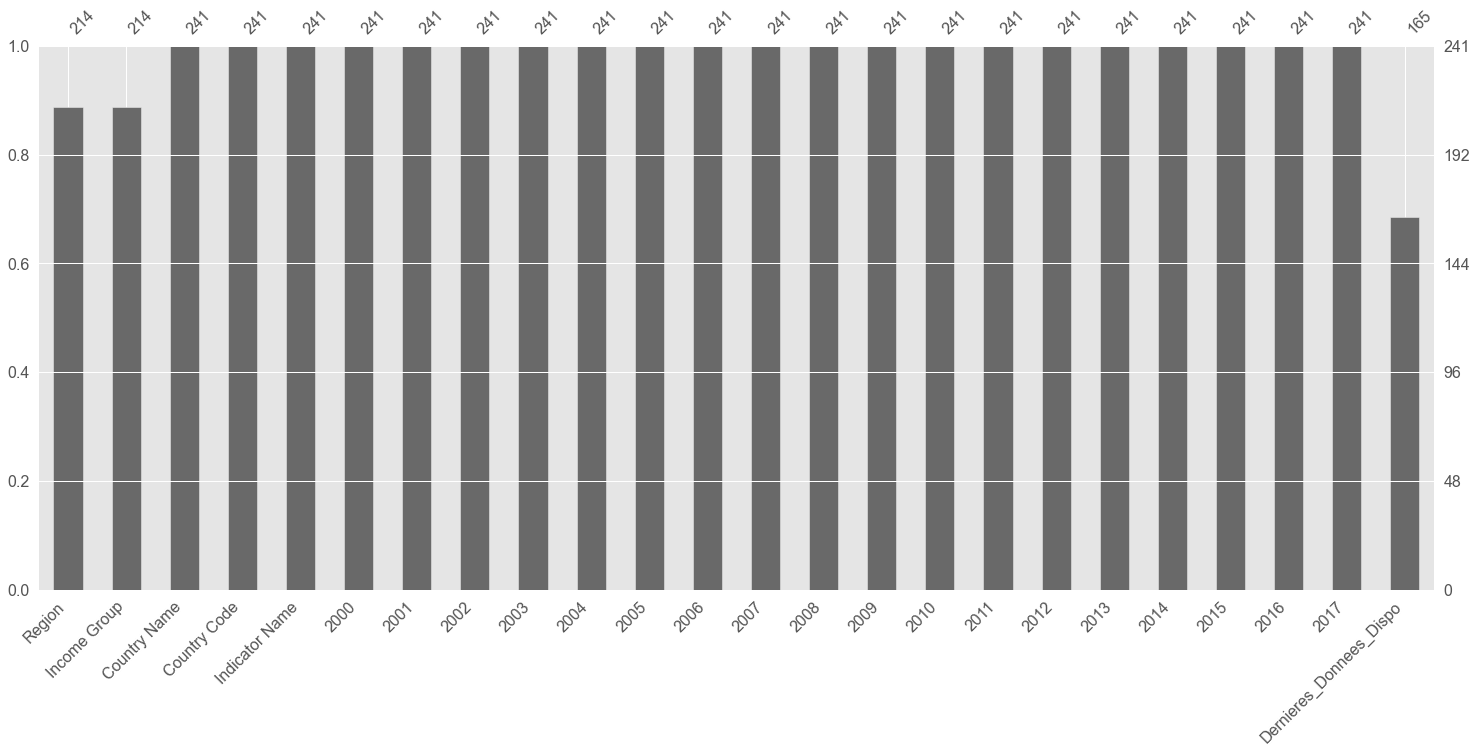

In [276]:
msno.bar(df_aide_gouvernement1_complet.sample(241))

In [277]:
df_aide_gouvernement1_complet.sort_values('Dernieres_Donnees_Dispo', ascending = False).head(20)

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernieres_Donnees_Dispo
452031,Europe & Central Asia,Upper middle income,Kazakhstan,KAZ,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,65.760048,65.760048,65.760048,65.760048
550986,Sub-Saharan Africa,Upper middle income,Mauritius,MUS,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,40.6777,38.302219,39.791431,40.23315,44.18119,46.088631,46.088631,48.640839,47.930641,52.646061,48.716579,53.754059,54.478619,61.626251,64.140472,64.140472,64.140472,64.140472
191816,East Asia & Pacific,High income: nonOECD,Brunei Darussalam,BRN,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,46.781631,46.781631,46.781631,46.781631,38.685341,38.685341,60.844349,60.844349,60.844349
514336,East Asia & Pacific,High income: nonOECD,"Macao SAR, China",MAC,Expenditure on secondary as % of government ex...,24.97225,24.97225,24.97225,24.97225,24.97225,24.97225,24.97225,24.97225,24.97225,24.97225,24.97225,24.97225,31.864941,55.062309,55.062309,55.062309,55.062309,55.062309,55.062309
122181,Europe & Central Asia,Lower middle income,Armenia,ARM,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,50.651131,48.881001,54.46204,54.46204,54.46204,54.46204,54.462040
221136,Latin America & Caribbean,High income: nonOECD,Cayman Islands,CYM,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,49.529652,54.026348,54.026348,54.026348,54.026348,54.026348,54.026348,54.026348,54.026348,54.026348,54.026348,54.026348,54.026348,54.026348
254121,Sub-Saharan Africa,Lower middle income,"Congo, Rep.",COG,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,30.168859,30.168859,30.168859,41.190338,41.190338,41.190338,41.190338,4

In [278]:
df_aide_gouvernement1_complet.groupby('Income Group').median('Dernieres_Donnees_Dispo')

,Dernieres_Donnees_Dispo
Income Group,
High income: OECD,36.979271
High income: nonOECD,36.211361
Low income,26.866381
Lower middle income,33.121178
Upper middle income,33.188175


In [279]:
df_aide_gouvernement1_complet.loc[df_aide_gouvernement1_complet['Dernieres_Donnees_Dispo'].isnull(),:]

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernieres_Donnees_Dispo
1236,NaN,NaN,Arab World,ARB,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,NaN
4901,NaN,NaN,East Asia & Pacific,EAS,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,NaN
8566,NaN,NaN,East Asia & Pacific (excluding high income),EAP,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,NaN
12231,NaN,NaN,Euro area,EMU,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expendit

In [280]:
# Supprime les régions et les incomes groupe

df_aide_gouvernement1_selection = df_aide_gouvernement1_complet.dropna(subset=['Region'])
df_aide_gouvernement1_selection

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernieres_Donnees_Dispo
92861,South Asia,Low income,Afghanistan,AFG,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,26.693729,26.624319,25.394859,25.77935,25.392059,24.3563,24.3563,24.3563,24.356300
96526,Europe & Central Asia,Upper middle income,Albania,ALB,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,19.83156,19.83156,19.83156,19.83156,19.83156,19.831560
100191,Middle East & North Africa,Upper middle income,Algeria,DZA,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,NaN
103856,East Asia & Pacific,Upper middle income,American Samoa,ASM,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,NaN
107521,Europe & Central Asia,High income: nonOECD,Andorra,AND,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,16.158621,16.158621,18.761909,20.61861,21.49304,24.6467,24.6467,26.127871,20.934

In [281]:
# On veut connaitre les pays qui n'ont pas de donnée sur l'inscription dans le secondaire et voir ce qu'on peut en faire.
# On regarde avec isna sur les dernières données disponibles.

df_aide_gouv_na = df_aide_gouvernement1_selection[df_aide_gouvernement1_selection['Dernieres_Donnees_Dispo'].isna()]
df_secondaire_pays_sans_donnees = df_aide_gouv_na.loc[:,['Country Name','Income Group','Dernieres_Donnees_Dispo']]
df_secondaire_pays_sans_donnees

# Il y a trop de pays sans données dispo ==> TO DO: trouver une méthode de complétude avec la médiane des Income Group

,Country Name,Income Group,Dernieres_Donnees_Dispo
100191,Algeria,Upper middle income,NaN
103856,American Samoa,Upper middle income,NaN
136841,Azerbaijan,Upper middle income,NaN
140506,"Bahamas, The",High income: nonOECD,NaN
155166,Belarus,Upper middle income,NaN
180821,Bosnia and Herzegovina,Upper middle income,NaN
232131,Channel Islands,High income: nonOECD,NaN
239461,China,Upper middle income,NaN
265116,Croatia,High income: nonOECD,NaN
290771,Dominica,Upper middle income,NaN


# BLOCAGE

In [282]:
# BLOCAGE - ça fonctionne MAIS ne dépend pas du groupe income. Faire une boucle?
df_aide_gouvernement1_selection['Dernieres_Donnees_Dispo'].replace([np.nan], df_aide_gouvernement1_selection['Dernieres_Donnees_Dispo'].median(), inplace=True)

# For i in range(1, len(df_aide_gouvernement1_selection)+1):
    # If (df_aide_gouvernement1_selection['Dernieres_Donnees_Dispo'] == np.nan) & (df_aide_gouvernement1_selection['Income Group'] == 'Upper middle income':
                                                                                 
df_aide_gouvernement1_selection.head(20)

C:\Users\choup\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernieres_Donnees_Dispo
92861,South Asia,Low income,Afghanistan,AFG,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,26.693729,26.624319,25.394859,25.77935,25.392059,24.3563,24.3563,24.3563,24.356300
96526,Europe & Central Asia,Upper middle income,Albania,ALB,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,19.83156,19.83156,19.83156,19.83156,19.83156,19.831560
100191,Middle East & North Africa,Upper middle income,Algeria,DZA,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,33.680889
103856,East Asia & Pacific,Upper middle income,American Samoa,ASM,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,33.680889
107521,Europe & Central Asia,High income: nonOECD,Andorra,AND,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,Expenditure on secondary as % of government ex...,16.158621,16.158621,18.761909,20.61861,21.49304,24.6467,24.6467,26.1

In [283]:
# sklearn.impute. SimpleImputer ( * , missing_values ​​= nan , strategy = 'mean' , fill_value = None , verbose = 'deprecated' , copy = True , add_indicator = False )[la source]¶

# FIN BLOCAGE

In [284]:
# Quels sont les pays avec le plus d'aides gouvernementales?

df_aide_gouvernement1_complet.loc[:,['Country Name','Dernieres_Donnees_Dispo']].sort_values('Dernieres_Donnees_Dispo', ascending = False).head(10)

,Country Name,Dernieres_Donnees_Dispo
452031,Kazakhstan,65.760048
550986,Mauritius,64.140472
191816,Brunei Darussalam,60.844349
514336,"Macao SAR, China",55.062309
122181,Armenia,54.462040
221136,Cayman Islands,54.026348
254121,"Congo, Rep.",53.331680
679261,Rwanda,52.825241
213806,Cameroon,52.553139
745231,Sri Lanka,49.336910


### 2. Dépenses pour le secondaire % PIB // NON CONSERVE

In [285]:
# Dépenses publiques dans l'enseignement secondaire en % du PIB = 
# Government expenditure in secondary institutions education as % of GDP (%)  

df_aide_gouvernement2 = df_base[df_base['Indicator Name'].isin(['Government expenditure in secondary institutions education as % of GDP (%)'])]
df_aide_gouvernement2_complet = df_aide_gouvernement2.fillna(method ='ffill', axis = 1)
df_aide_gouvernement2_complet['Dernieres_Donnees_Dispo'] = pd.to_numeric(df_aide_gouvernement2_complet['Dernieres_Donnees_Dispo'],errors='coerce', downcast="float")
df_aide_gouvernement2_complet.shape
# 80 en 2010, au max du remplissage

(241, 24)

<AxesSubplot:>

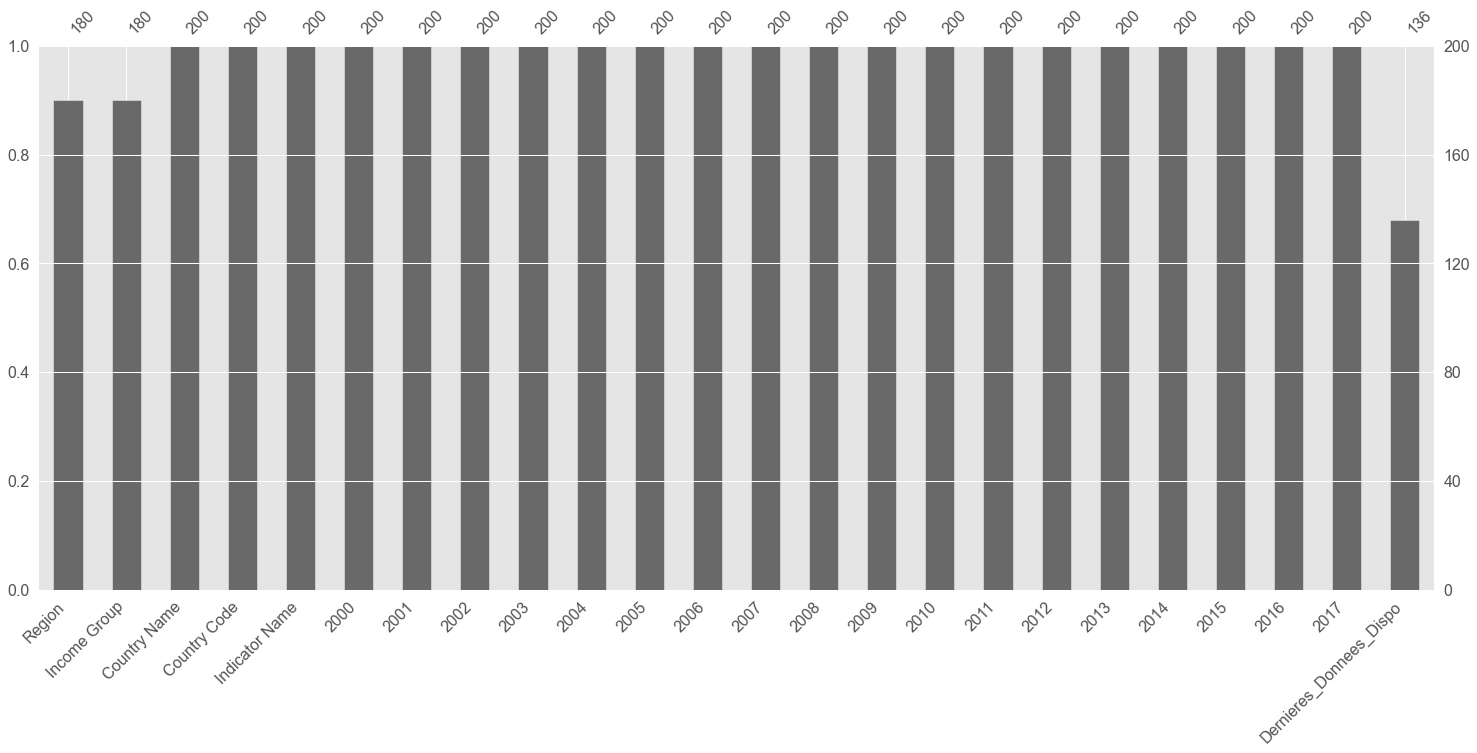

In [286]:
msno.bar(df_aide_gouvernement2_complet.sample(200))

Nous ne retenons pas cet indicateur car les données actualisées ne concernent que 133 pays (165 pays pour le précédent indicateur)

### IV. MATERIEL ADAPTE

In [287]:
# Taux d'utilisation d'Internet =
# Internet users (per 100 people)

df_internet = df_base[df_base['Indicator Name'].isin(['Internet users (per 100 people)'])]
df_internet_complet = df_internet.fillna(method ='ffill', axis = 1) 
df_internet_complet['Dernieres_Donnees_Dispo'] = pd.to_numeric(df_internet_complet['Dernieres_Donnees_Dispo'],errors='coerce', downcast="float")
df_internet_complet.shape

(241, 24)

<AxesSubplot:>

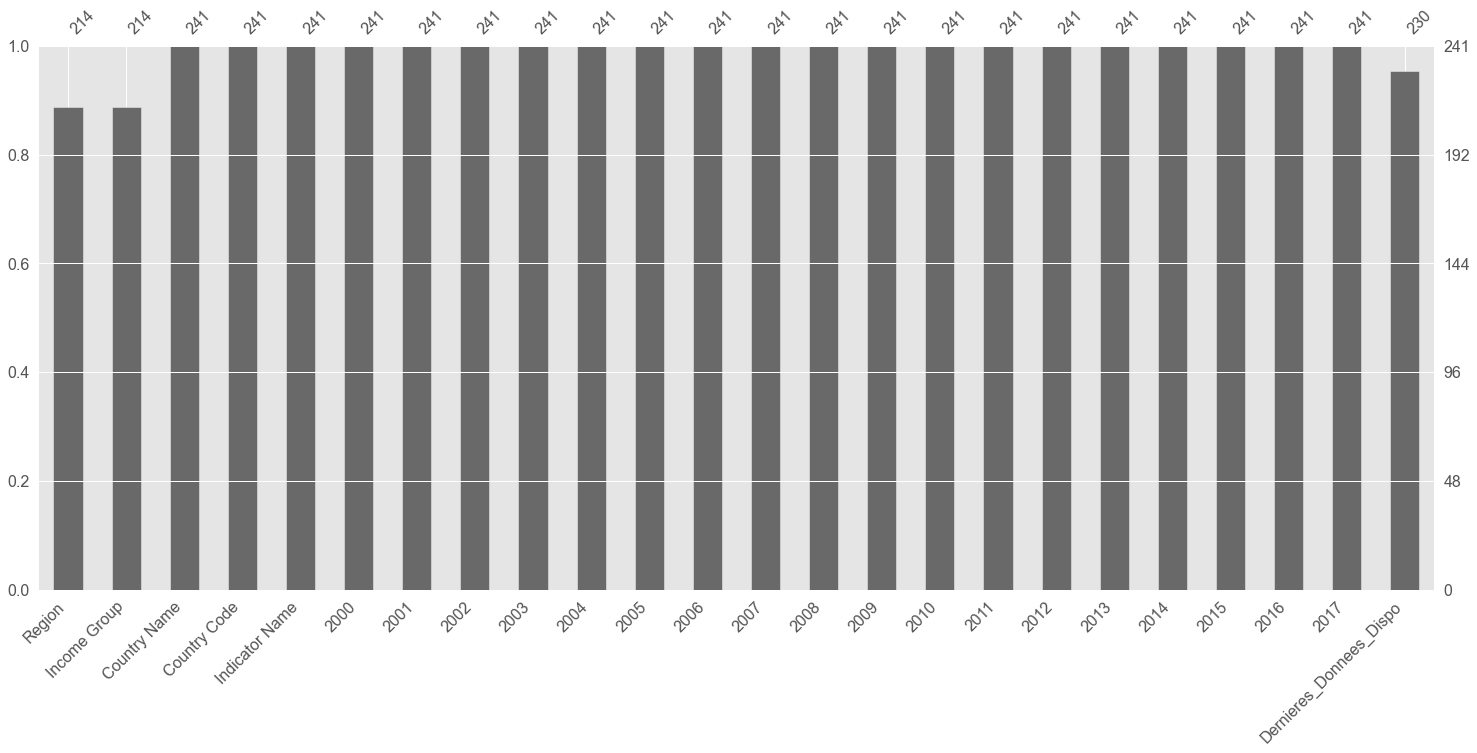

In [288]:
msno.bar(df_internet_complet.sample(241))

In [289]:
df_internet_complet.sort_values('Dernieres_Donnees_Dispo', ascending = False).head(20)

,Region,Income Group,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Dernieres_Donnees_Dispo
408190,Europe & Central Asia,High income: OECD,Iceland,ISL,Internet users (per 100 people),44.470534,49.392995,79.12,83.14,83.88,87.0,89.51,90.6,91.0,93.0,93.39,94.819687,96.2098,96.5468,98.16,98.2,98.240016,98.240016,98.240013
503480,Europe & Central Asia,High income: nonOECD,Liechtenstein,LIE,Internet users (per 100 people),36.51523,45.116853,59.470711,58.809692,64.007448,63.371356,64.214161,65.080218,70.0,75.0,80.0,85.0,89.4077,93.8,95.21,96.641195,98.093904,98.093904,98.093903
169965,North America,High income: nonOECD,Bermuda,BMU,Internet users (per 100 people),42.94986,47.5097,52.031597,56.522012,60.990867,65.447066,69.899655,74.350594,82.3,83.25,84.21,88.336,91.299305,95.3,96.8,98.32361,98.0,98.0,98.000000
144310,Middle East & North Africa,High income: nonOECD,Bahrain,BHR,Internet users (per 100 people),6.153733,15.038634,18.050721,21.554945,21.458681,21.303734,28.243952,32.91,51.95,53.0,55.0,76.999966,88.0,90.00004,90.503133,93.478301,97.999981,97.999981,97.999977
107660,Europe & Central Asia,High income: nonOECD,Andorra,AND,Internet users (per 100 people),10.538836,10.538836,11.260469,13.546413,26.837954,37.605766,48.936847,70.87,70.04,78.53,81.0,81.0,86.434425,94.0,95.9,96.91,97.930637,97.930637,97.930634
510810,Europe & Central Asia,High income: OECD,Luxembourg,LUX,Internet users (per 100 people),22.887328,36.163423,39.84,54.55,65.88,70.0,72.51,78.92,82.23,87.31,90.62,90.029859,91.949924,93.7765,94.67,97.3341,97.49393,97.49393,97.493927
624425,Europe & Central Asia,High income: OECD,Norway,NOR,Internet users (per 100 people),52.0,64.0,72.84,78.13,77.69,81.99,82.55,86.93,90.57,92.08,93.39,93.489983,94.649978,95.0534,96.3,96.8103,97.298204,97.298204,97.298203
283580,Europe & Central Asia,High income: OECD,Denmark,DNK,Internet users (per 100 people),39.172431,42.957525,64.25,76.26,80.93,82.74,86.65,85.03,85.02,86.84,88.72,89.810013,92.260012,94.6297,95.99,96.3305,96.967785,96.967785,96.967789
565785,Europe & Central Asia,High income: nonOECD,Monaco,MCO,Internet users (per 100 people),42.184863,46.646142,48.047117,49.491169,52.490197,55.464826,61.47604,64.377682,67.25,70.1,75.0,80.3,87.0,90.7,92.4,93.363302,95.208178,95.208178,95.208176
323895,Europe & Central Asia,High income: nonOECD,Faroe Islands,FRO,Internet users (per 100 people),32.916392,43.246984,53.299222,58.912641,66.533599,67.902632,69.359445,75.98,75.57,75.18,75.2,80.732173,85.335189,90.0,93.3,94.2,95.108682,95.108682,95.108681


In [290]:
df_internet_complet.groupby('Income Group').median('Dernieres_Donnees_Dispo')

,Dernieres_Donnees_Dispo
Income Group,
High income: OECD,87.237335
High income: nonOECD,77.289398
Low income,11.541593
Lower middle income,29.204401
Upper middle income,54.818771


In [291]:
# Supprime les régions et les incomes groupe

df_internet_selection = df_internet_complet.dropna(subset=['Region'])

In [292]:
# On veut connaitre les pays qui n'ont pas de donnée sur internet et voir ce qu'on peut en faire.
# On regarde avec isna sur les dernières données disponibles.

df_internet_na = df_internet_selection[df_internet_selection['Dernieres_Donnees_Dispo'].isna()]
df_internet_sans_donnees = df_internet_na.loc[:,['Country Name','Region','Dernieres_Donnees_Dispo']]
df_internet_sans_donnees

# Il y a trop de pays sans données dispo ==> TO DO: trouver une méthode de complétude avec la médiane des Income Group

,Country Name,Region,Dernieres_Donnees_Dispo
103995,American Samoa,East Asia & Pacific,NaN
232270,Channel Islands,Europe & Central Asia,NaN
272585,Curacao,Latin America & Caribbean,NaN
430180,Isle of Man,Europe & Central Asia,NaN
470495,Kosovo,Europe & Central Asia,NaN
620760,Northern Mariana Islands,East Asia & Pacific,NaN
716050,Sint Maarten (Dutch part),Latin America & Caribbean,NaN
738040,South Sudan,Sub-Saharan Africa,NaN
756365,St. Martin (French part),Latin America & Caribbean,NaN
822335,Turks and Caicos Islands,Latin America & Caribbean,NaN


In [293]:
# On constate que ce ne sont pas des pays à fort attrait pour notre projet => suppression des lignes

df_internet_selection = df_internet_selection.dropna(axis = 0, how = 'any')

In [294]:
# supprimer les lignes avec dernières données < 50% d'utilisateurs internet

seuil_connecte = 50
df_internet_selection = df_internet_selection.drop(df_internet_selection[df_internet_selection['Dernieres_Donnees_Dispo'] < seuil_connecte].index)

In [295]:
# Quels sont les pays avec le plus d'utilisateurs d'internet?

df_internet_selection.loc[:,['Country Name','Dernieres_Donnees_Dispo']].sort_values('Dernieres_Donnees_Dispo', ascending = False).head(10)

,Country Name,Dernieres_Donnees_Dispo
408190,Iceland,98.240013
503480,Liechtenstein,98.093903
169965,Bermuda,98.000000
144310,Bahrain,97.999977
107660,Andorra,97.930634
510810,Luxembourg,97.493927
624425,Norway,97.298203
283580,Denmark,96.967789
565785,Monaco,95.208176
323895,Faroe Islands,95.108681


***

## Note de l'analyse de fond des données  
A REDIGER

***

## V. Traitement des indicateurs

In [296]:
df_pivot_pop1_selection = df_pop1_selection.pivot(index='Country Name', columns='Indicator Name', values='Dernieres_Donnees_Dispo')

In [297]:
df_pivot_secondaire3 = df_secondaire3_selection.pivot(index='Country Name', columns='Indicator Name', values='Dernieres_Donnees_Dispo')

In [298]:
df_pivot_aide_gouvernement1 = df_aide_gouvernement1_selection.pivot(index='Country Name', columns='Indicator Name', values='Dernieres_Donnees_Dispo')

In [299]:
df_pivot_internet = df_internet_selection.pivot(index='Country Name', columns='Indicator Name', values='Dernieres_Donnees_Dispo')

In [300]:
result = pd.concat([df_pivot_pop1_selection, df_pivot_secondaire3, df_pivot_aide_gouvernement1,df_pivot_internet], axis = 1, join = 'inner')

In [301]:
result.head(5)

Indicator Name,"Population, total","Enrolment in secondary education, both sexes (number)",Expenditure on secondary as % of government expenditure on education (%),Internet users (per 100 people)
Country Name,,,,
Albania,2876101.0,315079.00,19.831560,66.363441
Argentina,43847432.0,4450741.00,41.477322,70.150764
Armenia,2924816.0,240291.00,54.462040,62.000000
Australia,24127160.0,2371284.00,32.361992,88.238655
Austria,8747358.0,691071.25,40.363781,84.323334


In [302]:
result.dtypes.value_counts()

float32    3
float64    1
dtype: int64

In [303]:
#result.isna().sum()

Text(0.5, 1.0, 'Corrélation HeatMap')

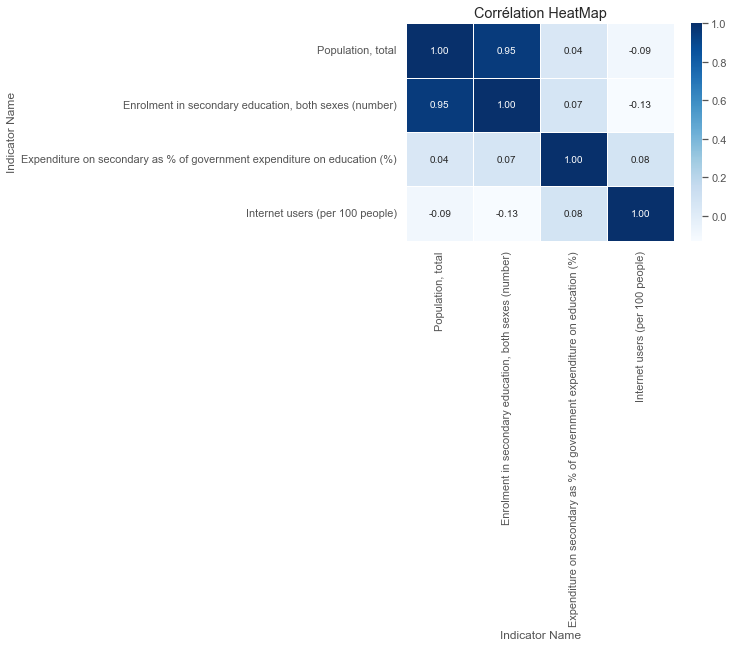

In [304]:
# Relation des indicateurs

import matplotlib.pyplot as plt

sns.heatmap(result.corr(), annot=True,fmt=".2f", cmap='Blues', linewidths=1.0)
plt.title('Corrélation HeatMap')

On constate une corrélation entre le nombre de population et le nombre d'inscription dans le secondaire. En soit, ce n'est pas très surprenant qu'il puisse y avoir plus d'inscriptions lorsque le nombre d'habitants est plus grand.

QUESTION: Peut on comparer des nombre avec des %?

C:\Users\choup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Internet users (per 100 people)', ylabel='Density'>

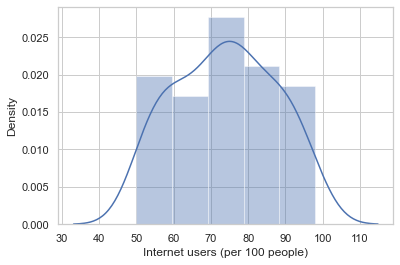

In [324]:
sns.distplot(result['Internet users (per 100 people)'])

## VI. Les Scores

In [306]:
result['SCORE_INSCRIPTION'] = result['Enrolment in secondary education, both sexes (number)']/result['Enrolment in secondary education, both sexes (number)'].max()

In [307]:
result['SCORE_AIDE_GOUV'] = result['Expenditure on secondary as % of government expenditure on education (%)']/result['Expenditure on secondary as % of government expenditure on education (%)'].max()

In [308]:
result['SCORE_INTERNET'] = result['Internet users (per 100 people)']/result['Internet users (per 100 people)'].max()

### 1. ANALYSE: corrélation entre les inscriptions et les aides gouvernementales

In [384]:
result['SCORE'] = (result['SCORE_AIDE_GOUV'] * 0.2 + (result['SCORE_INTERNET'] * 0.4) + result['SCORE_INSCRIPTION'] * 0.3)

In [385]:
result.sort_values('SCORE', ascending = False)

Indicator Name,"Population, total","Enrolment in secondary education, both sexes (number)",Expenditure on secondary as % of government expenditure on education (%),Internet users (per 100 people),SCORE_INSCRIPTION,SCORE_AIDE_GOUV,SCORE_INTERNET,SCORE
Country Name,,,,,,,,
United Kingdom,65637240.0,6556991.5,41.035831,94.775803,0.504643,0.624024,0.967100,0.663038
Germany,82667688.0,7112949.5,41.965271,89.647102,0.547431,0.638158,0.914767,0.657767
Japan,126994512.0,7227485.0,37.804859,92.000000,0.556246,0.574891,0.938776,0.657362
Mexico,127540424.0,12993322.0,31.982100,59.540447,1.000000,0.486345,0.607556,0.640291
Russian Federation,144342400.0,9384610.0,33.680889,76.409088,0.722264,0.512179,0.779685,0.630989
...,...,...,...,...,...,...,...,...
Dominican Republic,10648791.0,929493.0,17.953680,61.328190,0.071536,0.273018,0.625798,0.326384
Paraguay,6725308.0,631003.0,32.991661,51.349873,0.048564,0.501698,0.523978,0.324500
Georgia,3719300.0,277874.0,32.128830,50.001637,0.021386,0.488577,0.510221,0.308219


In [386]:
result['Population, total'].describe()

count           79.0
mean      22992772.0
std       31937404.0
min         582972.0
25%        3876709.5
50%        8547100.0
75%       31921934.0
max      144342400.0
Name: Population, total, dtype: float64

In [387]:
result.describe()

Indicator Name,"Population, total","Enrolment in secondary education, both sexes (number)",Expenditure on secondary as % of government expenditure on education (%),Internet users (per 100 people),SCORE_INSCRIPTION,SCORE_AIDE_GOUV,SCORE_INTERNET,SCORE
count,79.0,7.900000e+01,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,22992772.0,1.906443e+06,35.313723,73.822121,0.146725,0.537009,0.753287,0.452734
std,31937404.0,2.670640e+06,9.400224,13.434989,0.205539,0.142947,0.137092,0.084915
min,582972.0,3.008800e+04,12.111410,50.001637,0.002316,0.184176,0.510221,0.295818
25%,3876709.5,2.867965e+05,31.698319,61.664095,0.022073,0.482030,0.629226,0.397543
50%,8547100.0,6.677180e+05,33.912971,73.750900,0.051389,0.515708,0.752560,0.436618
75%,31921934.0,2.538356e+06,41.256577,84.972767,0.195358,0.627381,0.867069,0.501393
max,144342400.0,1.299332e+07,65.760048,97.999977,1.000000,1.000000,1.000000,0.663038


In [ ]:
result_ind

In [388]:
# On regarde si toutes la complétude des pays sélectionnés suivant les indicateurs choisis

result_ind.isna().sum()

Indicator Name
Country Name                                                                0
Population, total                                                           0
Enrolment in secondary education, both sexes (number)                       0
Expenditure on secondary as % of government expenditure on education (%)    0
Internet users (per 100 people)                                             0
SCORE_INSCRIPTION                                                           0
SCORE_AIDE_GOUV                                                             0
SCORE_INTERNET                                                              0
SCORE                                                                       0
dtype: int64

## VII. Graphiques

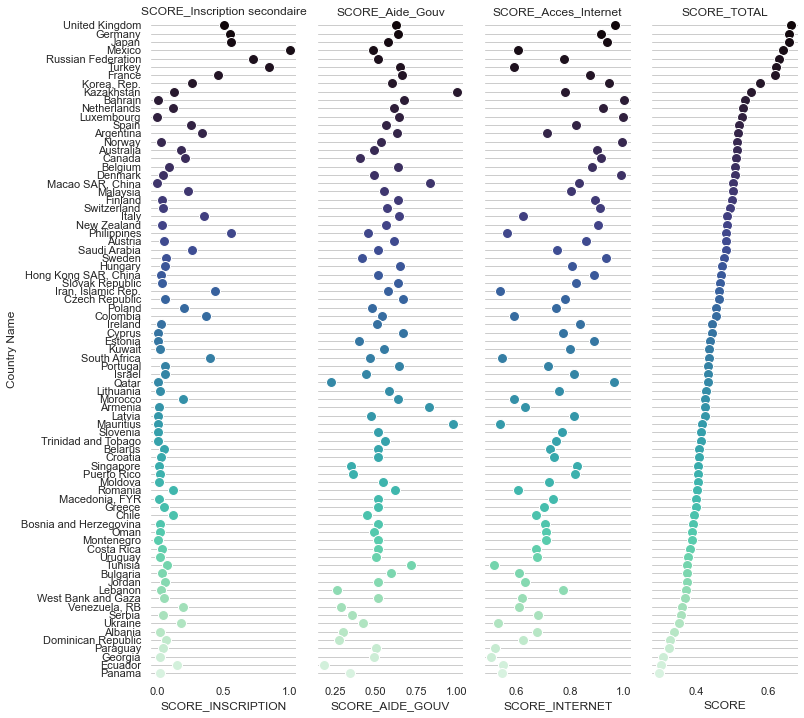

In [389]:
sns.set_theme(style="whitegrid")

# Faire les grilles
g = sns.PairGrid(result_ind.sort_values("SCORE", ascending=False),
                 x_vars=result_ind.columns[-4 :], y_vars=["Country Name"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="mako", linewidth=1, edgecolor="w")

titles = ["SCORE_Inscription secondaire", "SCORE_Aide_Gouv", "SCORE_Acces_Internet",
          "SCORE_TOTAL"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)


Text(0, 0.5, 'Country Name')

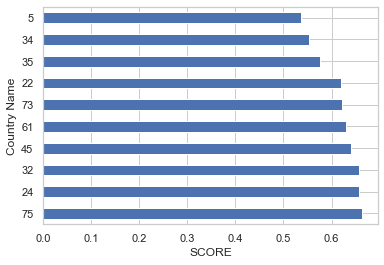

In [390]:
#result_ind.plot(kind='bar',x='Country Name',y='SCORE')

result_ind['SCORE'].sort_values(ascending=False)[:10].plot(kind='barh',x='Country Name',y='SCORE')
plt.xlabel('SCORE')
plt.ylabel('Country Name')

<AxesSubplot:title={'center':'Dernieres_Donnees_Dispo'}, xlabel='Region'>

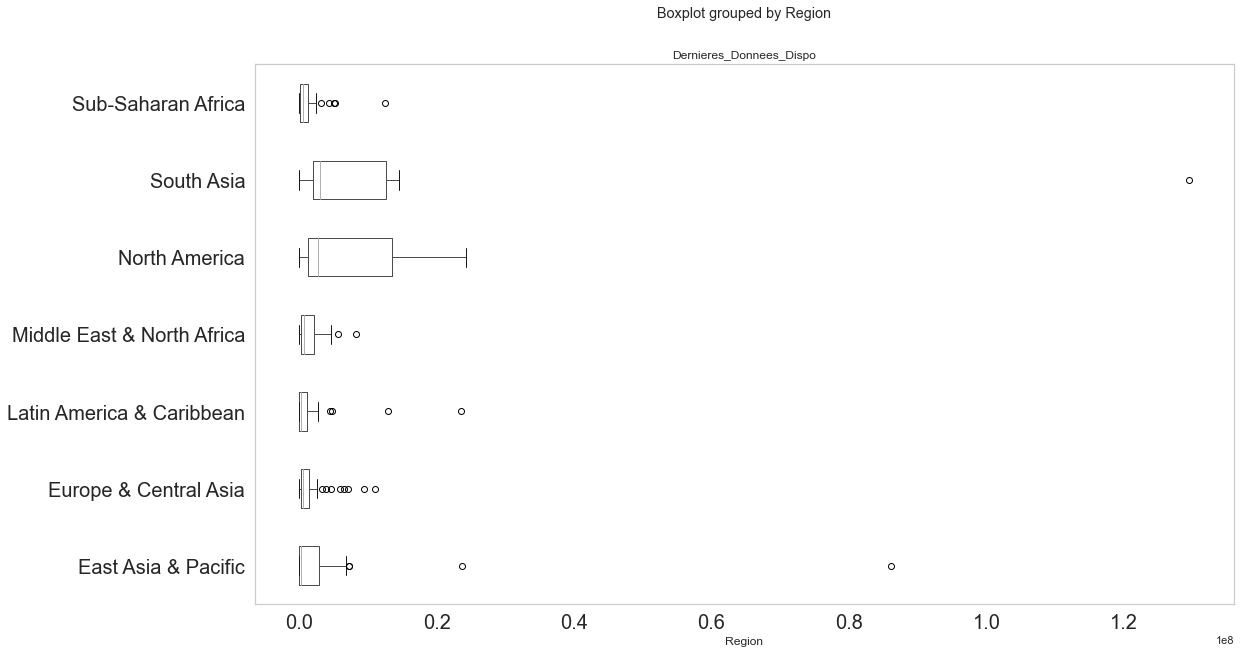

In [391]:
# A voir pour conserver ou pas
# Boxplot pour le nombre d'inscrits à l'école secondaire, par région

df_secondaire3_selection.boxplot(by ='Region', column =['Dernieres_Donnees_Dispo'],figsize=(17,10), grid = False, fontsize = 20, vert = False)

In [392]:
df_secondaire3_complet.groupby('Region').median('Dernieres_Donnees_Dispo')

,Dernieres_Donnees_Dispo
Region,
East Asia & Pacific,330163.0
Europe & Central Asia,553448.0
Latin America & Caribbean,278941.0
Middle East & North Africa,766943.0
North America,2697507.0
South Asia,2988023.5
Sub-Saharan Africa,567838.0


<AxesSubplot:title={'center':'Dernieres_Donnees_Dispo'}, xlabel='Region'>

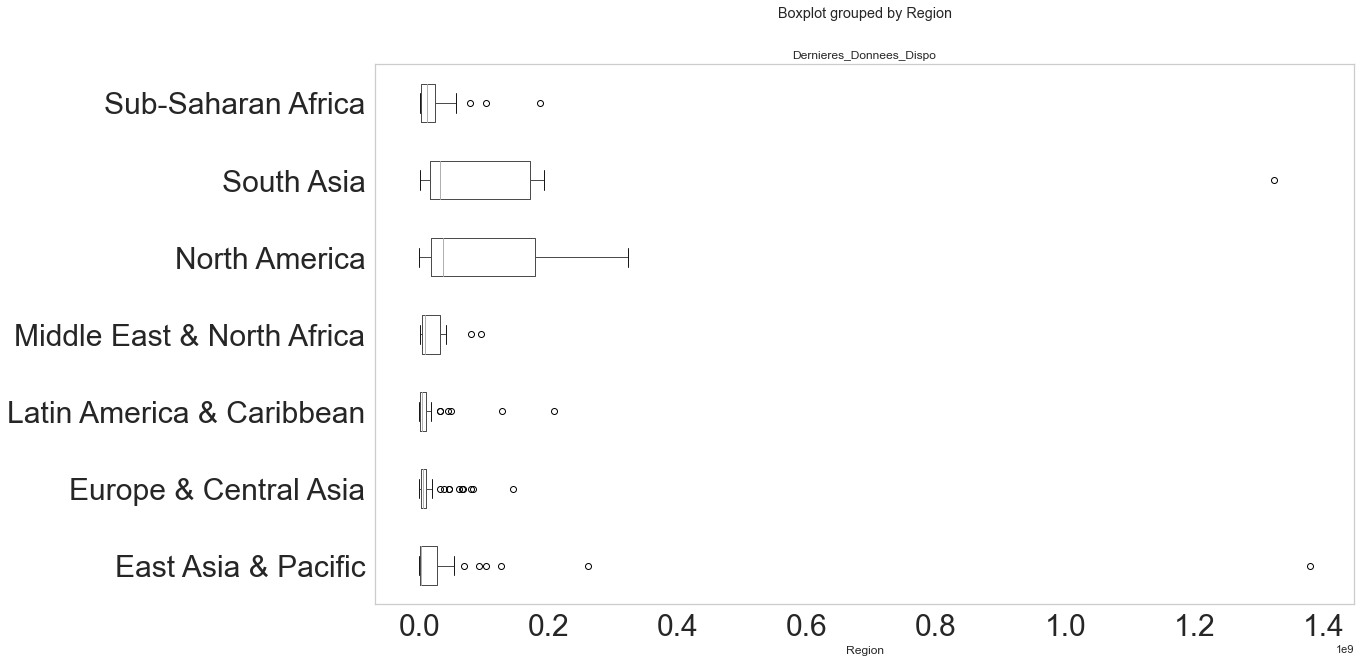

In [393]:
# Boxplot pour la population, par région

df_pop1_complet.boxplot(by ='Region', column =['Dernieres_Donnees_Dispo'],figsize=(17,10), grid = False, fontsize = 30, vert = False)

In [394]:
# Visualisation du PIB par Région
# Sélection de l'indication dans le dataframe
# Exploitation des données de 2016 (plus de données récentes)

df_PIB = df_base[df_base['Indicator Name'].isin(['GDP, PPP (constant 2011 international $)'])]

In [395]:
result_ind.sort_values('SCORE', ascending = False).head(10)

Indicator Name,Country Name,"Population, total","Enrolment in secondary education, both sexes (number)",Expenditure on secondary as % of government expenditure on education (%),Internet users (per 100 people),SCORE_INSCRIPTION,SCORE_AIDE_GOUV,SCORE_INTERNET,SCORE
75,United Kingdom,65637240.0,6556991.5,41.035831,94.775803,0.504643,0.624024,0.967100,0.663038
24,Germany,82667688.0,7112949.5,41.965271,89.647102,0.547431,0.638158,0.914767,0.657767
32,Japan,126994512.0,7227485.0,37.804859,92.000000,0.556246,0.574891,0.938776,0.657362
45,Mexico,127540424.0,12993322.0,31.982100,59.540447,1.000000,0.486345,0.607556,0.640291
61,Russian Federation,144342400.0,9384610.0,33.680889,76.409088,0.722264,0.512179,0.779685,0.630989
73,Turkey,79512424.0,10969178.0,42.864960,58.347733,0.844217,0.651839,0.595385,0.621787
22,France,66896108.0,5947212.0,43.684490,85.622200,0.457713,0.664301,0.873696,0.619653
35,"Korea, Rep.",51245708.0,3396766.0,39.355518,92.716545,0.261424,0.598472,0.946087,0.576556
34,Kazakhstan,17797032.0,1713090.0,65.760048,76.800003,0.131844,1.000000,0.783674,0.553023
5,Bahrain,1425171.0,92454.0,44.224640,97.999977,0.007116,0.672515,1.000000,0.536638


<AxesSubplot:title={'center':'2016'}, xlabel='Region'>

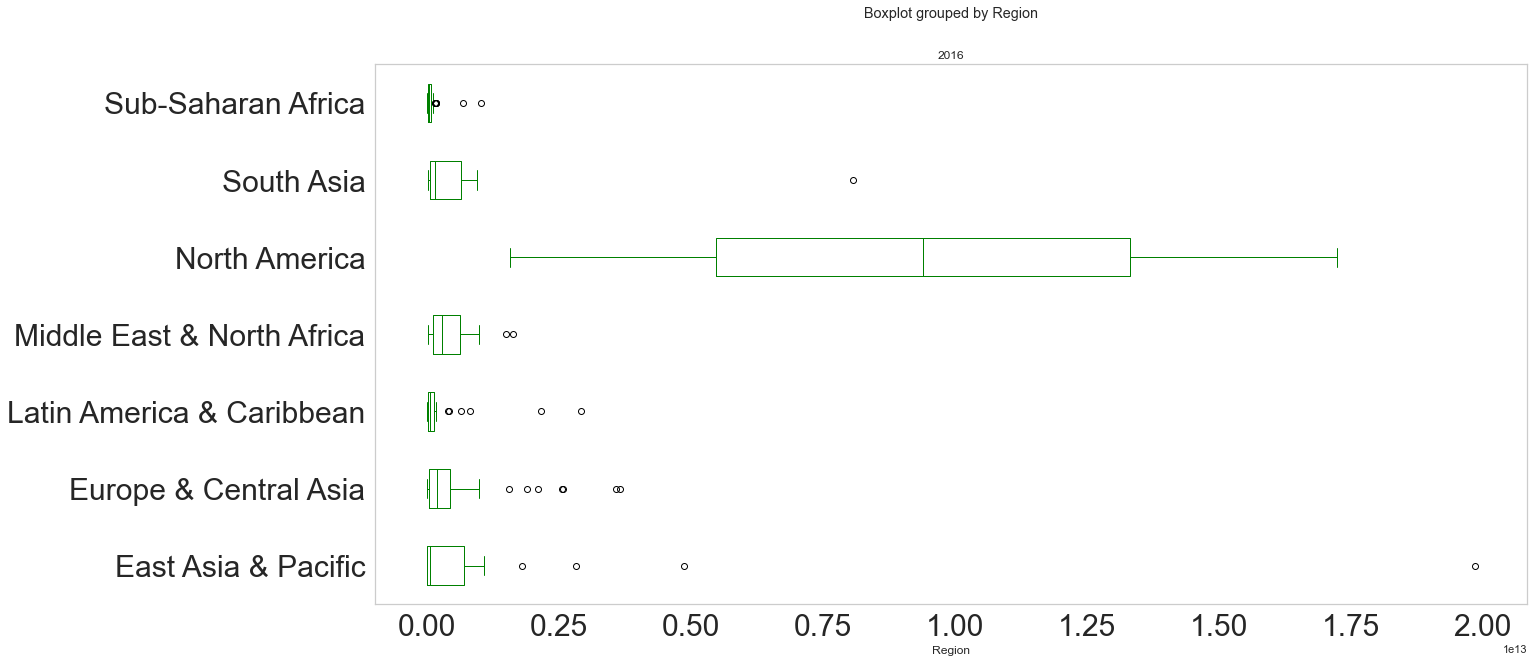

In [396]:
df_PIB.boxplot(by ='Region', column =['2016'],figsize=(20,10), grid = False, fontsize = 30, vert = False, color = "green")

In [397]:
# idées de graphiques: faire un histogramme horizontal avec les 3 scores (en couleurs) qui se cumulent pour 
# les 10 premiers pays

# graphique de l'évolution des inscriptions pour les 10 premiers pays en évolution par an

# carte du monde avec pays colorié en couleur suivant score


## Evolution

In [398]:
df_secondaire3_complet.groupby('Region').median('Dernieres_Donnees_Dispo')

,Dernieres_Donnees_Dispo
Region,
East Asia & Pacific,330163.0
Europe & Central Asia,553448.0
Latin America & Caribbean,278941.0
Middle East & North Africa,766943.0
North America,2697507.0
South Asia,2988023.5
Sub-Saharan Africa,567838.0


In [401]:
df_secondaire3_complet.groupby('Region').mean('Dernieres_Donnees_Dispo')

,Dernieres_Donnees_Dispo
Region,
East Asia & Pacific,4.965728e+06
Europe & Central Asia,1.513734e+06
Latin America & Caribbean,1.653885e+06
Middle East & North Africa,1.768009e+06
North America,8.977108e+06
South Asia,2.060894e+07
Sub-Saharan Africa,1.229300e+06


In [417]:
folium.Map()

NameError: name 'folium' is not defined